# Importing Libraries

In [1]:
from pathlib import Path  # For file and path manipulation
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical data visualization
import numpy as np  # Numerical operations
import plotly.graph_objects as go  # Interactive plotting
from plotly.subplots import make_subplots  # For creating subplots with Plotly

# Ensures that plots are displayed inline in the Jupyter notebook
%matplotlib inline  

# Set pandas to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Statistical functions from scipy
from scipy.stats import skew, norm  # For skewness and normality tests
from scipy.special import boxcox1p  # For Box-Cox transformations
from scipy.spatial import distance
from scipy.stats import boxcox_normmax  # To find the lambda parameter for Box-Cox transformations
from scipy.stats import chi2  # For chi-squared distribution functions
from scipy.stats import zscore  # For standardizing data to z-scores

# For calculating the Mahalanobis distance, which is a measure of distance between a point and a distribution
from scipy.spatial.distance import mahalanobis

# Machine learning functions from scikit-learn
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.base import BaseEstimator, TransformerMixin  # Base classes for custom transformers
from sklearn.compose import ColumnTransformer, make_column_selector  # For transforming columns of dataframes
from sklearn.impute import SimpleImputer  # For handling missing data
from sklearn.pipeline import make_pipeline, Pipeline  # For creating a pipeline of transformations
from sklearn.preprocessing import StandardScaler, FunctionTransformer  # For scaling and custom transformations
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder  # For encoding categorical variables
from sklearn.preprocessing import PowerTransformer  # For applying power transformations to features
from sklearn.tree import DecisionTreeRegressor  # Decision tree for regression
from sklearn.ensemble import RandomForestRegressor  # Random forest for regression
from sklearn.model_selection import GridSearchCV,cross_val_score  # For cross-validation and hyperparameter tuning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For calculating mean squared error of predictions
import xgboost as xgb  # Gradient boosting framework
from sklearn.linear_model import Ridge, Lasso, ElasticNet  # Linear models with regularization
#for calculating PFI
from sklearn.inspection import permutation_importance

import optuna  # Optimization framework to tune hyperparameters

# Predefined color palette for consistent plotting
colors = ["#bfd3e6", "#9b5b4f", "#4e4151", "#dbba78", "#bb9c55", "#909195","#dc1e1e","#a02933","#716807","#717cb4"]



In [2]:
# Load Data
df = pd.read_csv(Path("data/train.csv"))

In [3]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [4]:
# Display the first few rows of the dataset
df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,rl,65.0,8450,pave,NaN,reg,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2003,2003,gable,compshg,vinylsd,vinylsd,brkface,196.0,gd,ta,pconc,gd,ta,no,glq,706,unf,0,150,856,gasa,ex,y,sbrkr,856,854,0,1710,1,0,2,1,3,1,gd,8,typ,0,NaN,attchd,2003.0,rfn,2,548,ta,ta,y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,wd,normal,208500
1,2,20,rl,80.0,9600,pave,NaN,reg,lvl,allpub,fr2,gtl,veenker,feedr,norm,1fam,1story,6,8,1976,1976,gable,compshg,metalsd,metalsd,NaN,0.0,ta,ta,cblock,gd,ta,gd,alq,978,unf,0,284,1262,gasa,ex,y,sbrkr,1262,0,0,1262,0,1,2,0,3,1,ta,6,typ,1,ta,attchd,1976.0,rfn,2,460,ta,ta,y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,wd,normal,181500
2,3,60,rl,68.0,11250,pave,NaN,ir1,lvl,allpub,inside,gtl,collgcr,norm,norm,1fam,2story,7,5,2001,2002,gable,compshg,vinylsd,vinylsd,brkface,162.0,gd,ta,pconc,gd,ta,mn,glq,486,unf,0,434,920,gasa,ex,y,sbrkr,920,866,0,1786,1,0,2,1,3,1,gd,6,typ,1,ta,attchd,2001.0,rfn,2,608,ta,ta,y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,wd,normal,223500
3,4,70,rl,60.0,9550,pave,NaN,ir1,lvl,allpub,corner,gtl,crawfor,norm,norm,1fam,2story,7,5,1915,1970,gable,compshg,wd_sdng,wd_shng,NaN,0.0,ta,ta,brktil,ta,gd,no,alq,216,unf,0,540,756,gasa,gd,y,sbrkr,961,756,0,1717,1,0,1,0,3,1,gd,7,typ,1,gd,detchd,1998.0,unf,3,642,ta,ta,y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,wd,abnorml,140000
4,5,60,rl,84.0,14260,pave,NaN,ir1,lvl,allpub,fr2,gtl,noridge,norm,norm,1fam,2story,8,5,2000,2000,gable,compshg,vinylsd,vinylsd,brkface,350.0,gd,ta,pconc,gd,ta,av,glq,655,unf,0,490,1145,gasa,ex,y,sbrkr,1145,1053,0,2198,1,0,2,1,4,1,gd,9,typ,1,ta,attchd,2000.0,rfn,3,836,ta,ta,y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,wd,normal,250000


# Data exploration

### Summary statistics

In [5]:
df.describe().T.style.bar(subset=['mean'],color='colors[3]').background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
id,1460.000000,730.500000,421.610009,1.000000,365.750000,730.500000,1095.250000,1460.000000
mssubclass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
lotfrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
lotarea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
overallqual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
overallcond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
yearbuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
yearremodadd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
masvnrarea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
bsmtfinsf1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000


* The dataset has 1460 entries.
* Some columns have missing values. For instance, "lotfrontage" has 1201 non-null entries, meaning there are 259 missing values.
* The "SalePrice" columnhas values ranging from 34,900 to 755,000.

### Check data types in data frame

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [7]:
df['mssubclass'] = df['mssubclass'].apply(str)
df['yrsold'] = df['yrsold'].astype(str)
df['mosold'] = df['mosold'].astype(str)

### Missing values

In [8]:
#checking missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_data = missing_data[missing_data > 0]   
missing_data = pd.DataFrame(missing_data, columns=['Missing Values'])
missing_data['Percentage'] = round(missing_data['Missing Values']/len(df)*100,2)
missing_data.style.bar(color=colors[7],subset=['Percentage'])

,Missing Values,Percentage
poolqc,1453,99.520000
miscfeature,1406,96.300000
alley,1369,93.770000
fence,1179,80.750000
masvnrtype,872,59.730000
fireplacequ,690,47.260000
lotfrontage,259,17.740000
garageyrblt,81,5.550000
garagecond,81,5.550000
garagetype,81,5.550000


* There are several columns with missing values, the top ones being "poolQC" (1453 missing), "miscfeature" (1406 missing), "alley" (1369 missing), and "fence" (1179 missing).
* Other columns with a notable amount of missing values include "fireplacequ" and "lotfrontage".

Suggested Handling Strategies:
* Drop Columns: For columns with a very high percentage of missing values (e.g., PoolQC, MiscFeature, Alley, Fence), it might be reasonable to drop them, as they are likely to be mostly uninformative.

In [9]:
# Drop columns with a high percentage of missing values
df = df.drop(columns=['poolqc', 'miscfeature', 'alley', 'fence','fireplacequ','masvnrtype'])

# Data Visualization

## Target Variable

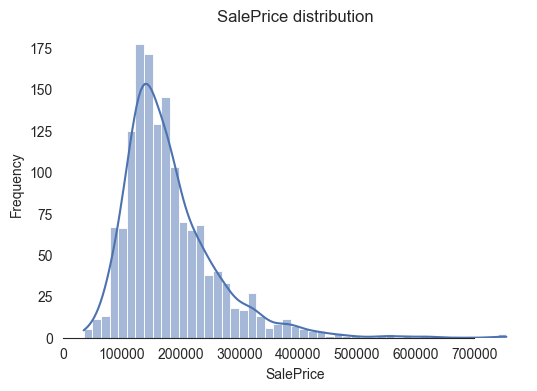

In [10]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(6, 4))
#Check the new distribution 
sns.histplot(df['saleprice'], color="b", kde=True)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

In [11]:
# Skew and kurt
print("Skewness: %f" % df['saleprice'].skew())
print("Kurtosis: %f" % df['saleprice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


* The Sale Price is right-skewed, indicating that most houses are in the lower price range, with a few houses in the higher price range.
* There are a few outliers with very high Sale Prices.

## Correlation


In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

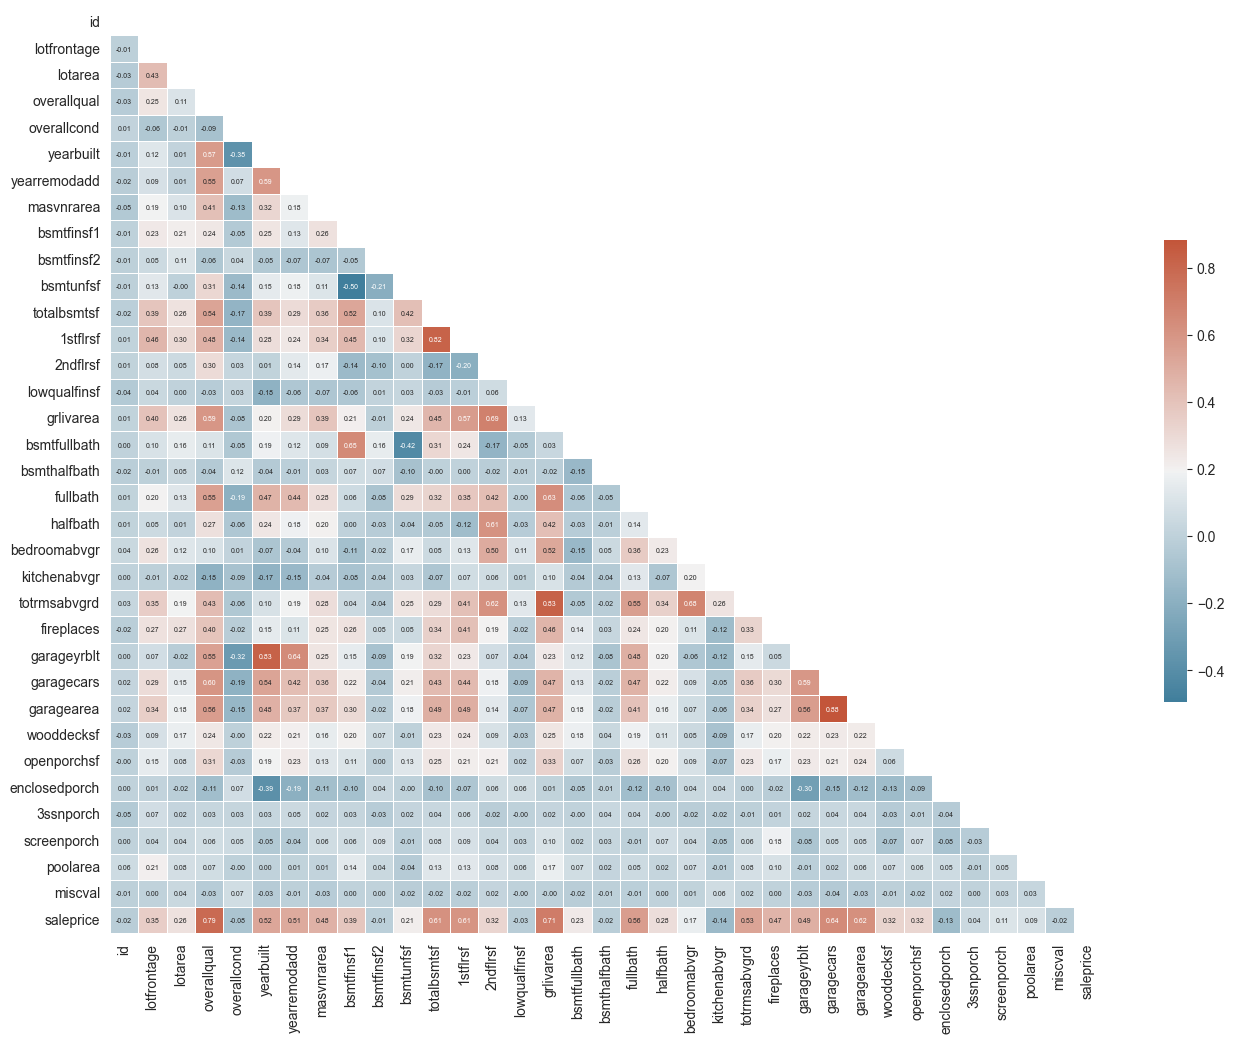

In [13]:
# correlation matrix only upper triangle, font size 10
corr = df_num.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", annot_kws={'size':5}, linewidths=.6, cbar_kws={"shrink": .5});



In [14]:
saleprice_correlations = corr['saleprice'].sort_values(ascending=False)

# Filter out features with high correlation with SalePrice (either positive or negative)
# Setting the threshold as 0.5 or -0.5 for high correlation
high_correlations = saleprice_correlations[abs(saleprice_correlations) > 0.5]
high_correlations = high_correlations.drop('saleprice')  # Exclude SalePrice itself

high_correlations

overallqual     0.790982
grlivarea       0.708624
garagecars      0.640409
garagearea      0.623431
totalbsmtsf     0.613581
1stflrsf        0.605852
fullbath        0.560664
totrmsabvgrd    0.533723
yearbuilt       0.522897
yearremodadd    0.507101
Name: saleprice, dtype: float64

## Visualize features with high correlation

<Figure size 2000x2000 with 0 Axes>

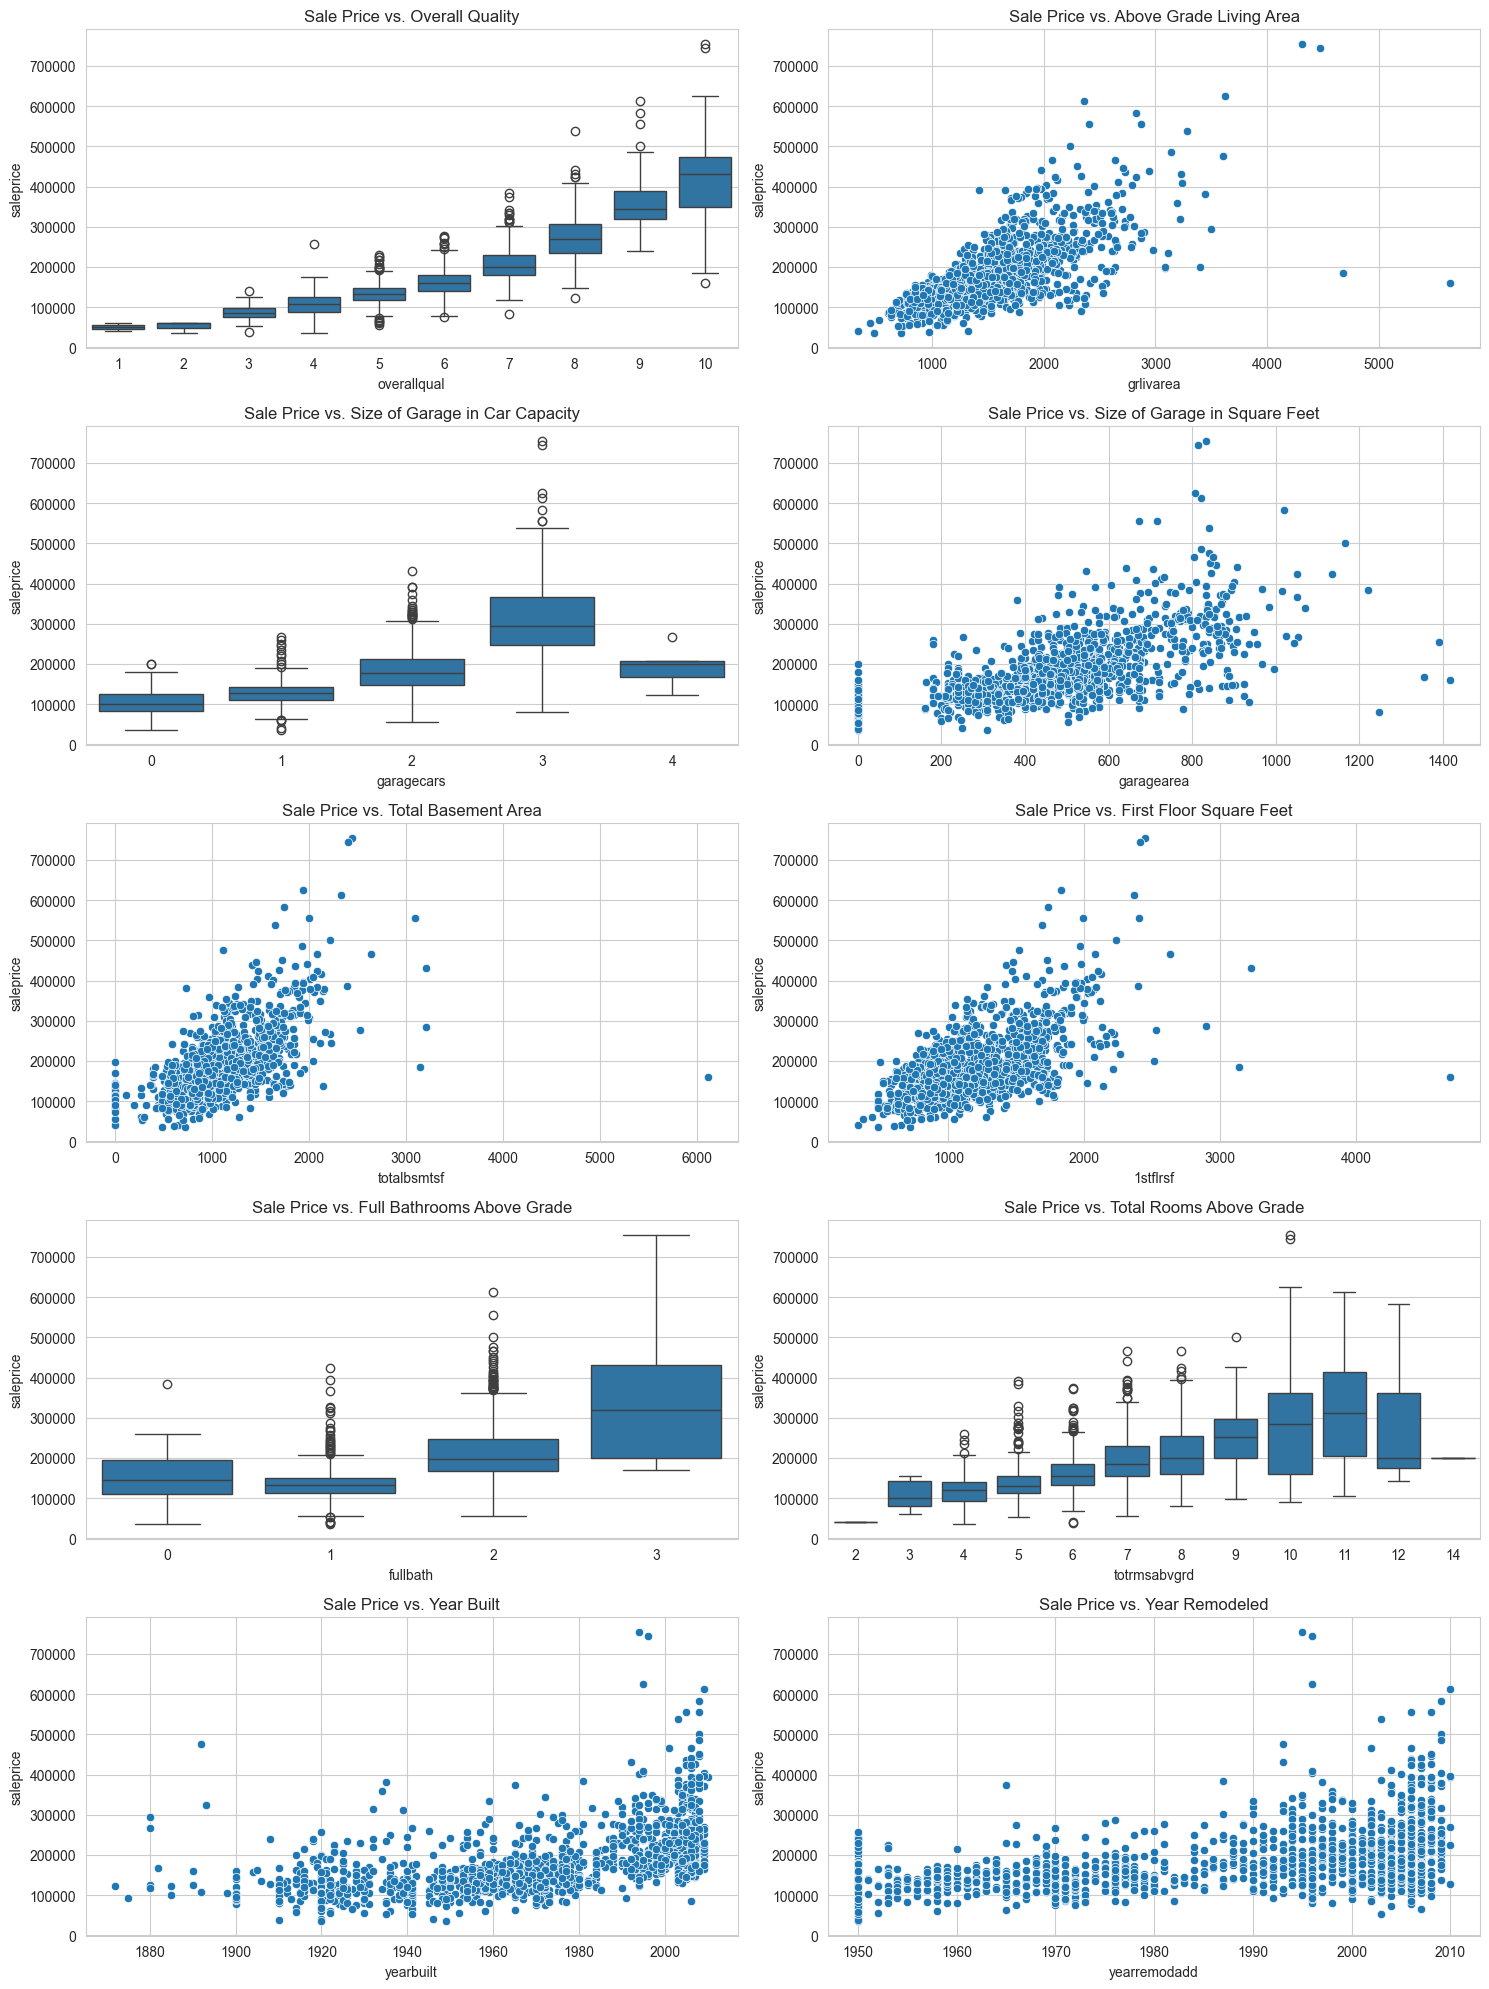

In [15]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 20))

# Create subplots for the highly correlated features
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Scatter plot for OverallQual vs. saleprice
sns.boxplot(x='overallqual', y='saleprice', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Sale Price vs. Overall Quality')

# Scatter plot for GrLivArea vs. saleprice
sns.scatterplot(x='grlivarea', y='saleprice', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Sale Price vs. Above Grade Living Area')

# Scatter plot for GarageCars vs. saleprice
sns.boxplot(x='garagecars', y='saleprice', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Sale Price vs. Size of Garage in Car Capacity')

# Scatter plot for GarageArea vs. saleprice
sns.scatterplot(x='garagearea', y='saleprice', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Sale Price vs. Size of Garage in Square Feet')

# Scatter plot for TotalBsmtSF vs. saleprice
sns.scatterplot(x='totalbsmtsf', y='saleprice', data=df, ax=axs[2, 0])
axs[2, 0].set_title('Sale Price vs. Total Basement Area')

# Scatter plot for 1stFlrSF vs. saleprice
sns.scatterplot(x='1stflrsf', y='saleprice', data=df, ax=axs[2, 1])
axs[2, 1].set_title('Sale Price vs. First Floor Square Feet')

# Scatter plot for FullBath vs. saleprice
sns.boxplot(x='fullbath', y='saleprice', data=df, ax=axs[3, 0])
axs[3, 0].set_title('Sale Price vs. Full Bathrooms Above Grade')

# Scatter plot for TotRmsAbvGrd vs. saleprice
sns.boxplot(x='totrmsabvgrd', y='saleprice', data=df, ax=axs[3, 1])
axs[3, 1].set_title('Sale Price vs. Total Rooms Above Grade')

# Scatter plot for YearBuilt vs. saleprice
sns.scatterplot(x='yearbuilt', y='saleprice', data=df, ax=axs[4, 0])
axs[4, 0].set_title('Sale Price vs. Year Built')

# Scatter plot for YearRemodAdd vs. saleprice
sns.scatterplot(x='yearremodadd', y='saleprice', data=df, ax=axs[4, 1])
axs[4, 1].set_title('Sale Price vs. Year Remodeled')

# Adjust layout
plt.tight_layout()
plt.show()

The visualizations provide insights into how different features relate to Sale Price:

1. Sale Price vs. Overall Quality (OverallQual):
There is a clear positive relationship between overall quality and Sale Price. Higher quality houses tend to have higher Sale Prices.
2. Sale Price vs. Above Grade Living Area (GrLivArea):
Larger living areas tend to result in higher Sale Prices. There are a few outliers with large living areas but relatively low Sale Prices.
3. Sale Price vs. Size of Garage in Car Capacity (GarageCars):
Houses with larger garages (in terms of car capacity) tend to have higher Sale Prices.
4. Sale Price vs. Size of Garage in Square Feet (GarageArea):
There is a positive relationship between the size of the garage and Sale Price.
5. Sale Price vs. Total Basement Area (TotalBsmtSF):
Larger basements are associated with higher Sale Prices. There are a few outliers with large basements but low Sale Prices.
6. Sale Price vs. First Floor Square Feet (1stFlrSF):
Larger first floors tend to result in higher Sale Prices.
7. Sale Price vs. Full Bathrooms Above Grade (FullBath):
Houses with more full bathrooms tend to have higher Sale Prices.
8. Sale Price vs. Total Rooms Above Grade (TotRmsAbvGrd):
More rooms are generally associated with higher Sale Prices.
9. Sale Price vs. Year Built:
Newer houses tend to have higher Sale Prices. There is a positive trend over time.
10. Sale Price vs. Year Remodeled (YearRemodAdd):
Houses that have been more recently remodeled tend to have higher Sale Prices.

## Check Qualitative Variables

In [16]:
# select all categorical features
categorical_vars = df.select_dtypes(include = ['object'])

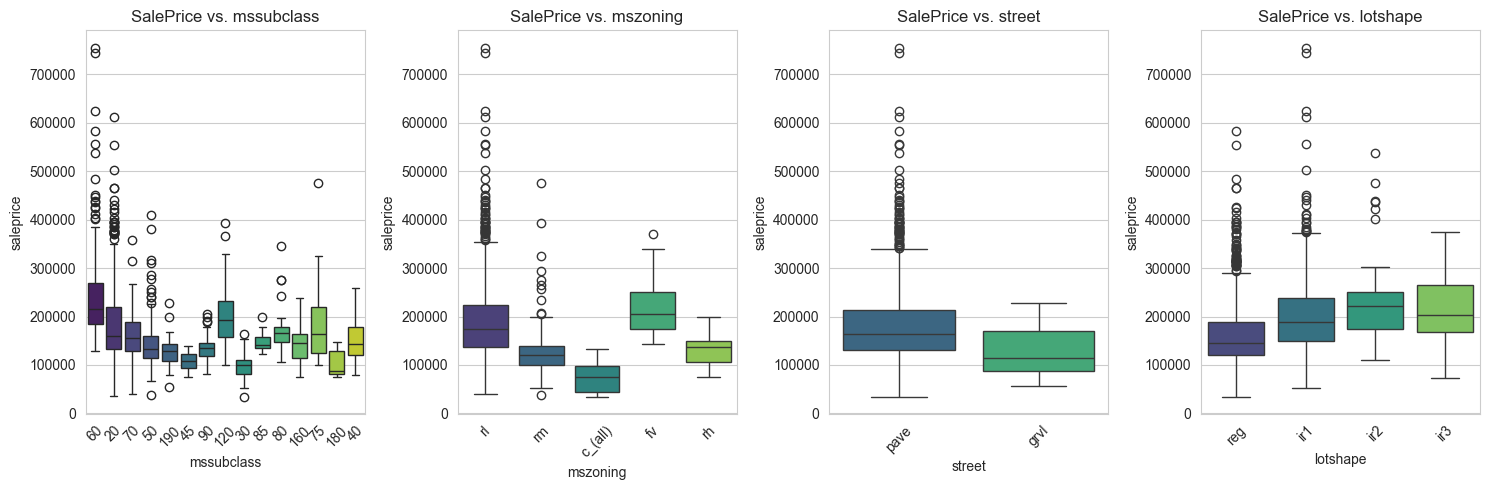

ANOVA p-value for mssubclass: 0.0000
ANOVA p-value for mszoning: 0.0000
ANOVA p-value for street: 0.1170
ANOVA p-value for lotshape: 0.0000


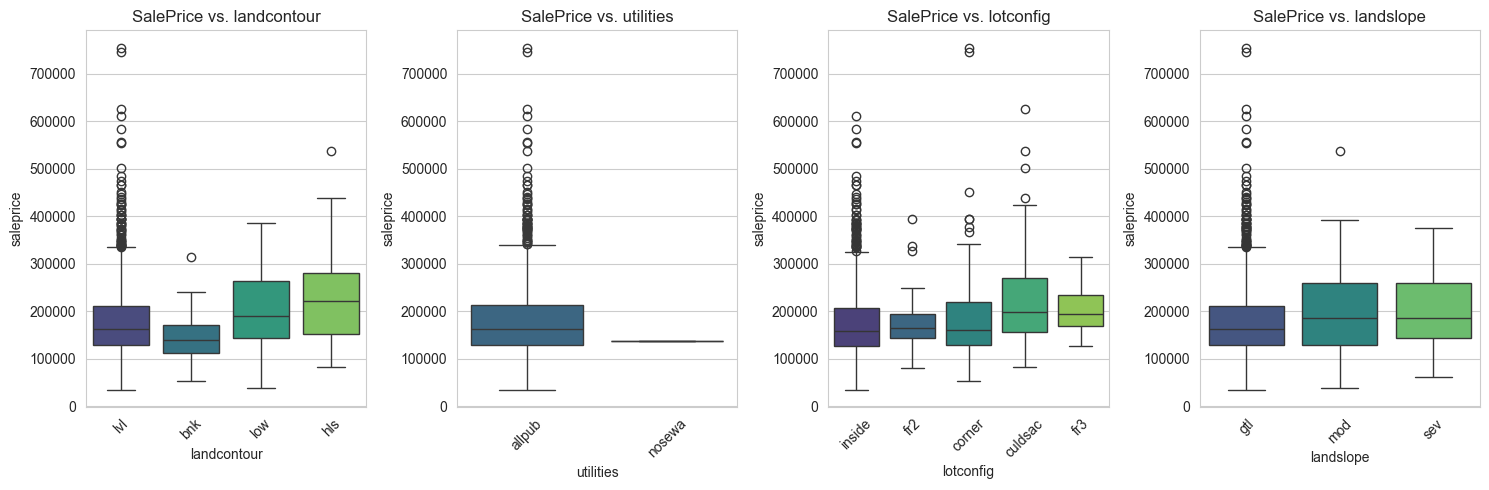

ANOVA p-value for landcontour: 0.0000
ANOVA p-value for utilities: nan
ANOVA p-value for lotconfig: 0.0000
ANOVA p-value for landslope: 0.1414


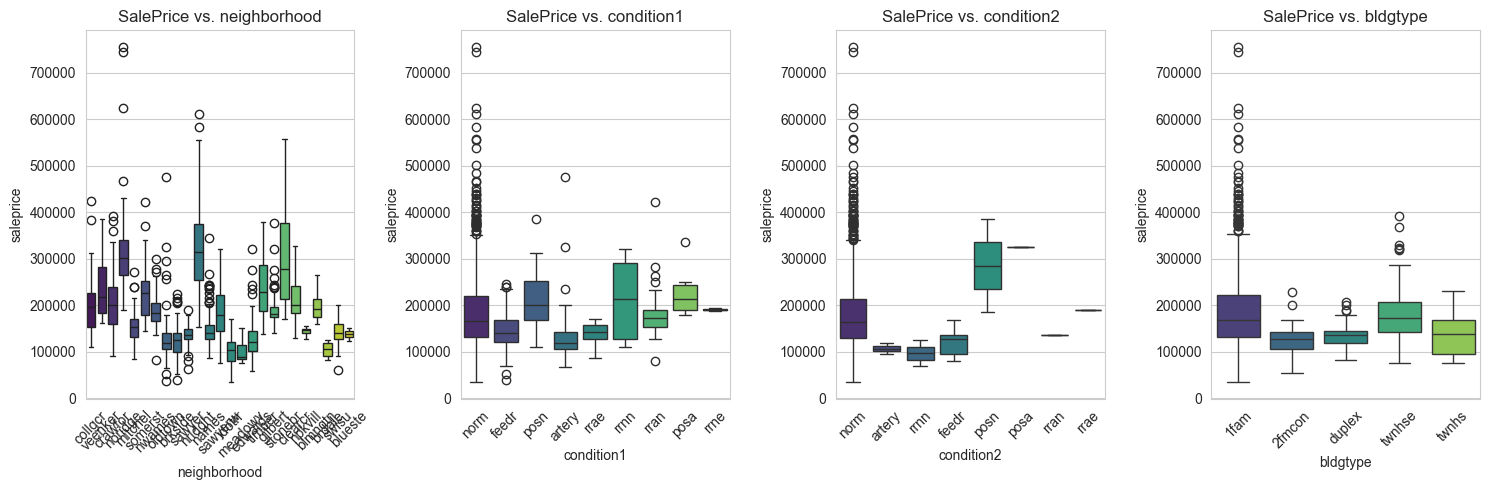

ANOVA p-value for neighborhood: 0.0000
ANOVA p-value for condition1: 0.0000
ANOVA p-value for condition2: 0.0282
ANOVA p-value for bldgtype: 0.0000


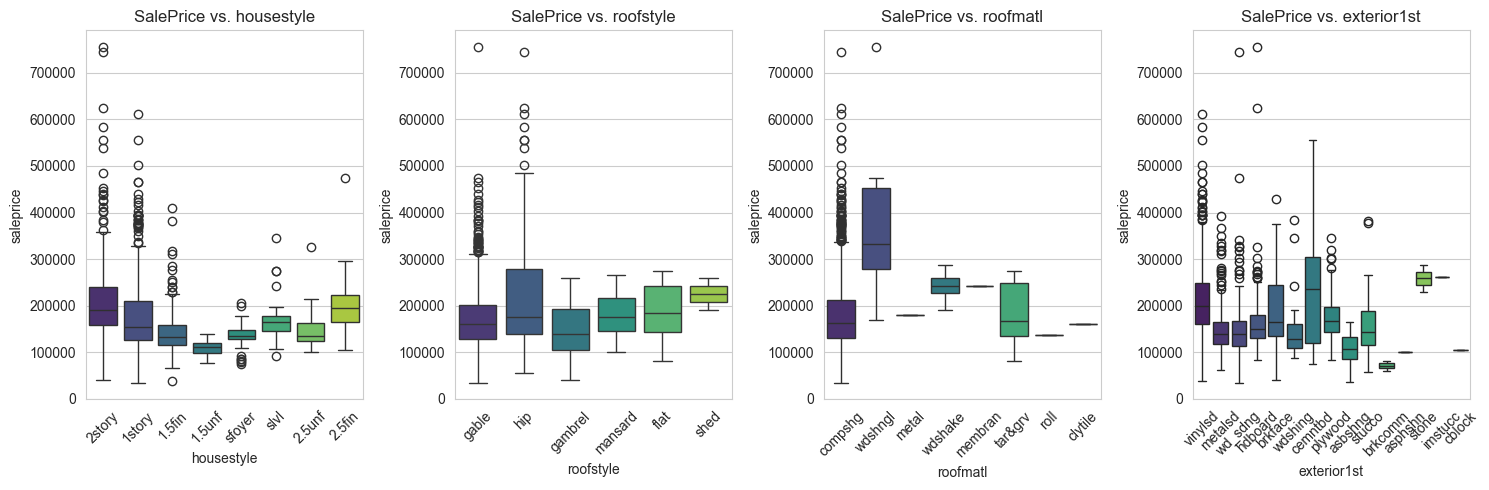

ANOVA p-value for housestyle: 0.0000
ANOVA p-value for roofstyle: 0.0000
ANOVA p-value for roofmatl: 0.0000
ANOVA p-value for exterior1st: 0.0000


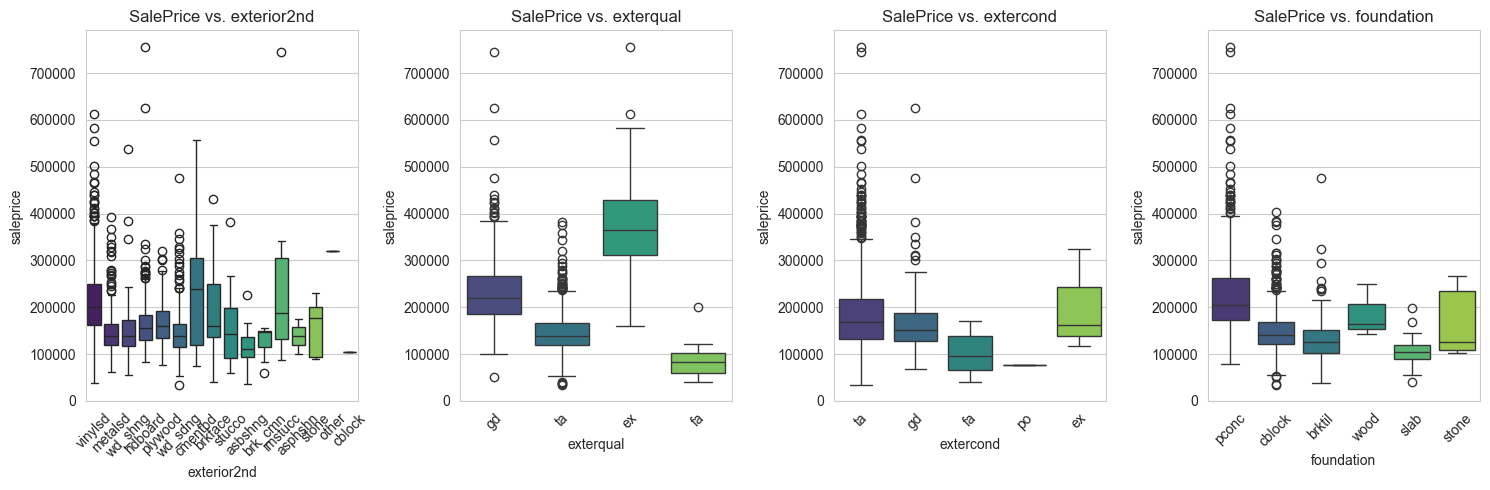

ANOVA p-value for exterior2nd: 0.0000
ANOVA p-value for exterqual: 0.0000
ANOVA p-value for extercond: 0.0000
ANOVA p-value for foundation: 0.0000


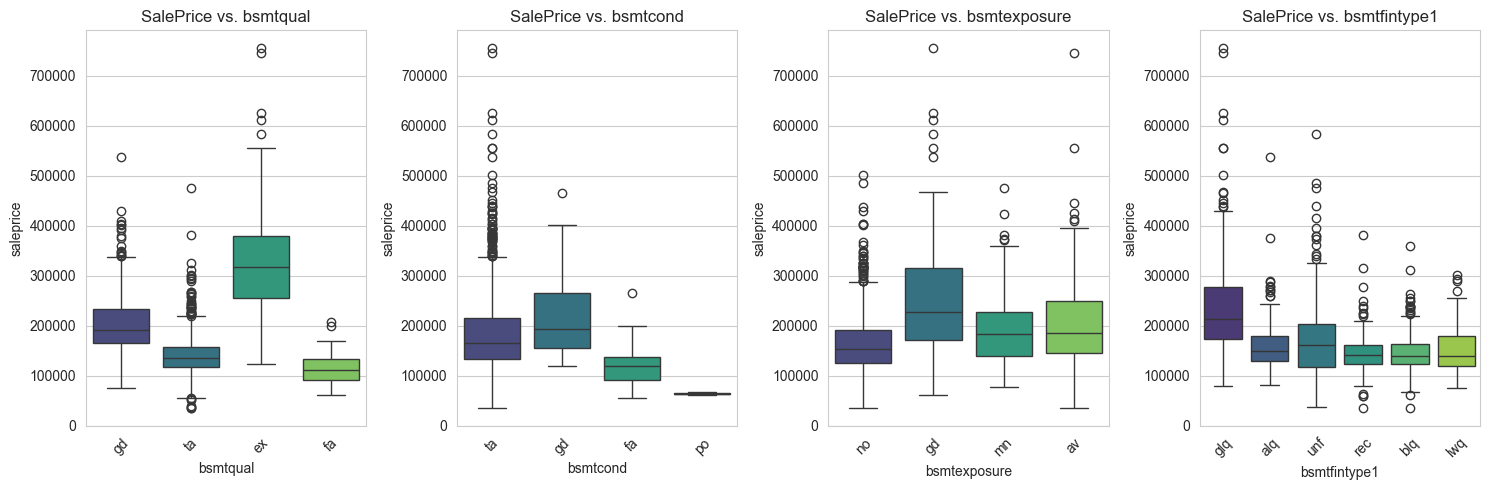

ANOVA p-value for bsmtqual: 0.0000
ANOVA p-value for bsmtcond: 0.0000
ANOVA p-value for bsmtexposure: 0.0000
ANOVA p-value for bsmtfintype1: 0.0000


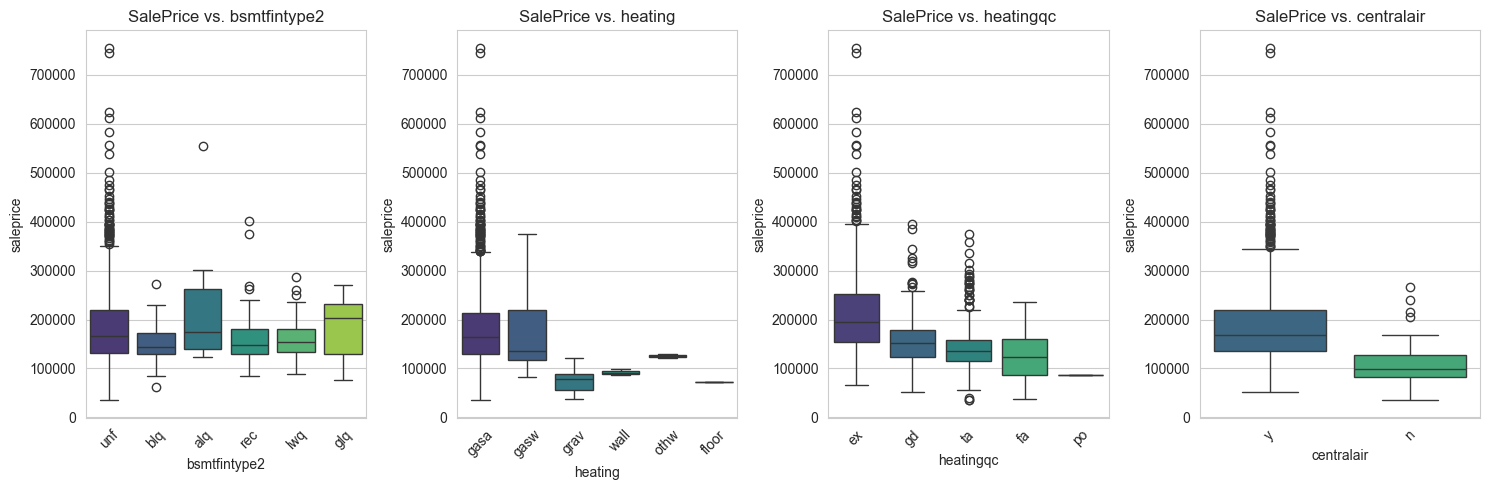

ANOVA p-value for bsmtfintype2: 0.0194
ANOVA p-value for heating: 0.0007
ANOVA p-value for heatingqc: 0.0000
ANOVA p-value for centralair: 0.0000


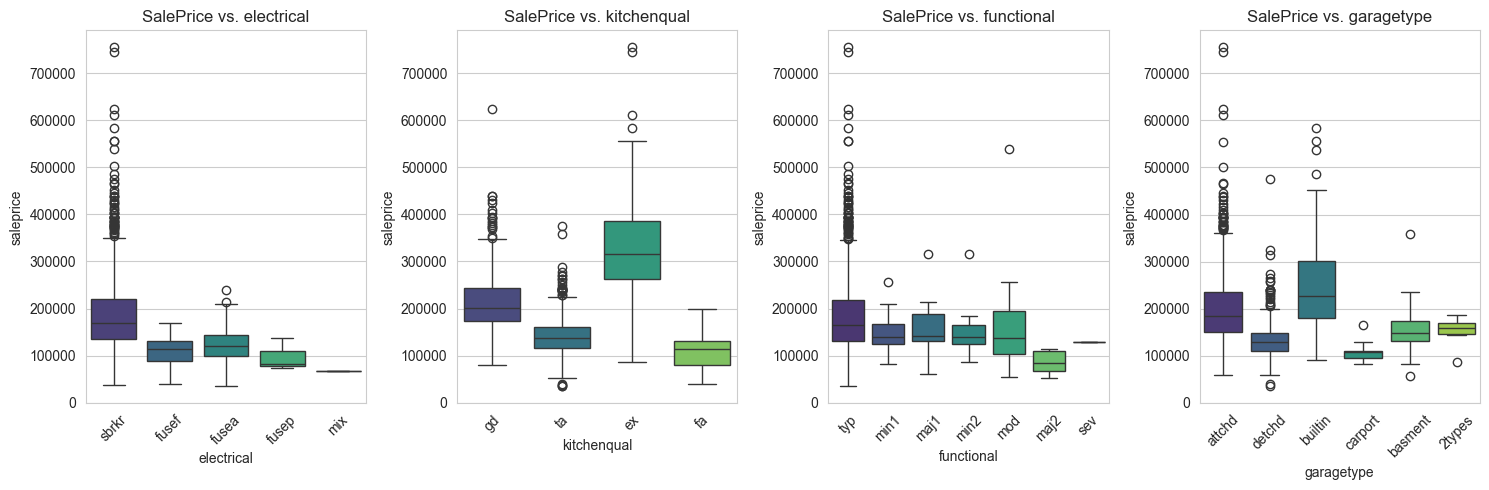

ANOVA p-value for electrical: 0.0000
ANOVA p-value for kitchenqual: 0.0000
ANOVA p-value for functional: 0.0002
ANOVA p-value for garagetype: 0.0000


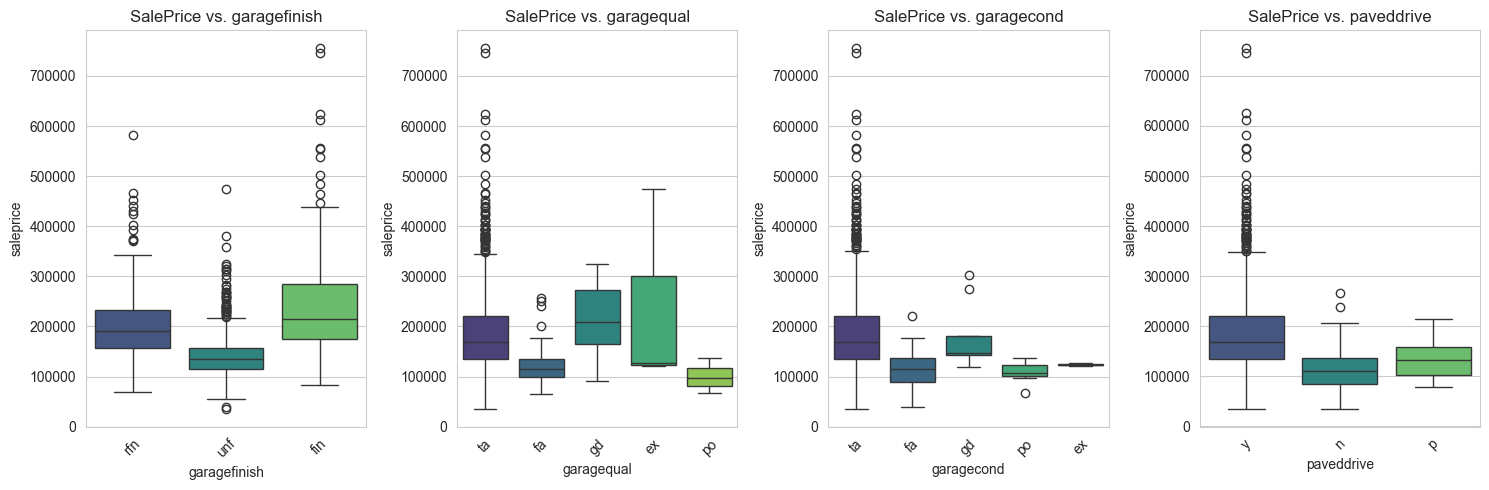

ANOVA p-value for garagefinish: 0.0000
ANOVA p-value for garagequal: 0.0000
ANOVA p-value for garagecond: 0.0000
ANOVA p-value for paveddrive: 0.0000


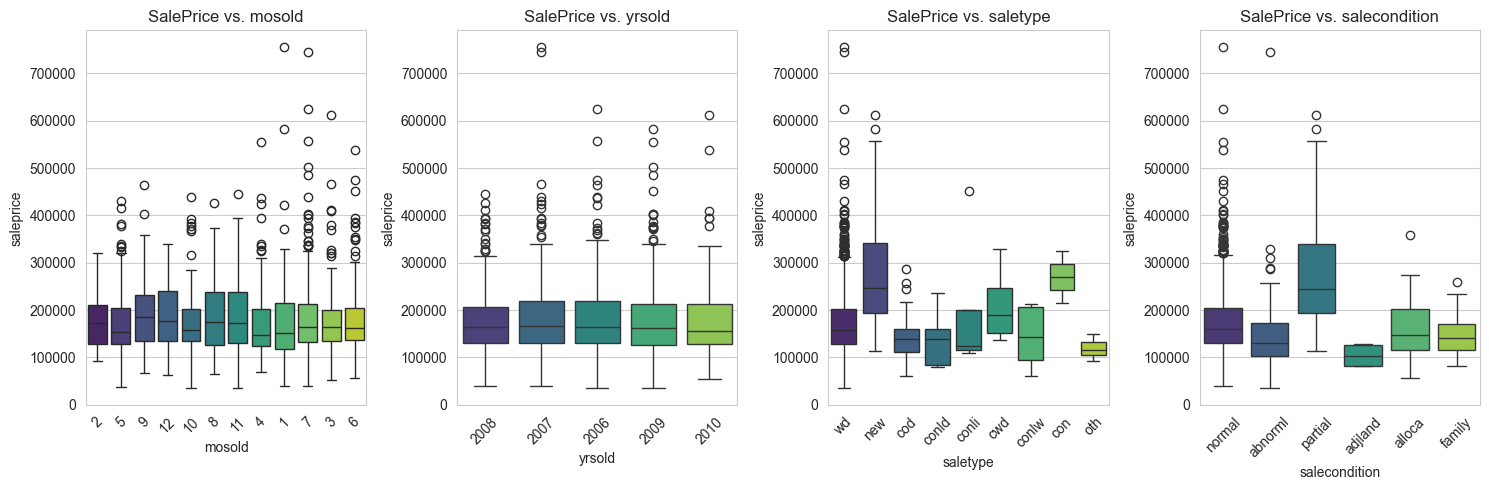

ANOVA p-value for mosold: 0.4834
ANOVA p-value for yrsold: 0.6301
ANOVA p-value for saletype: 0.0000
ANOVA p-value for salecondition: 0.0000
Categorical variables with significant p-values:
street
landslope
mosold
yrsold


{'mssubclass': 8.662166266093021e-79,
 'mszoning': 8.817633866272648e-35,
 'street': 0.11704860406782483,
 'lotshape': 6.447523852011766e-25,
 'landcontour': 2.7422167521379096e-08,
 'utilities': nan,
 'lotconfig': 3.163167473604189e-06,
 'landslope': 0.1413963584114019,
 'neighborhood': 1.558600282771154e-225,
 'condition1': 8.904549416138854e-08,
 'condition2': 0.028243373719792898,
 'bldgtype': 2.0567364604967015e-10,
 'housestyle': 3.376776535121222e-25,
 'roofstyle': 3.653523047099126e-17,
 'roofmatl': 7.582188186769724e-10,
 'exterior1st': 1.2550026343079851e-44,
 'exterior2nd': 1.804511038334062e-43,
 'exterqual': 1.4395510967787893e-204,
 'extercond': 3.1249951965255855e-07,
 'foundation': 5.791895002232234e-91,
 'bsmtqual': 9.610615106781709e-186,
 'bsmtcond': 5.136900937703027e-09,
 'bsmtexposure': 1.022670629183227e-42,
 'bsmtfintype1': 1.8077310066862167e-63,
 'bsmtfintype2': 0.019410089690234594,
 'heating': 0.000686395274686335,
 'heatingqc': 5.041728703727091e-68,
 'cent

In [17]:
from scipy.stats import f_oneway

# Function to perform ANOVA and return the p-value
def anova_test(df, categorical_var, numerical_var='saleprice'):
    categories = df[categorical_var].unique()
    samples = [df[df[categorical_var] == category][numerical_var].dropna() for category in categories if len(df[df[categorical_var] == category]) > 1]
    if len(samples) > 1:
        f_statistic, p_value = f_oneway(*samples)
        return p_value
    else:
        return np.nan

# Initialize a dictionary to store the p-values for ANOVA tests
anova_p_values = {}

# Number of categorical variables to display at a time
num_vars_to_display = 4

# Create box plots for categorical variables and perform ANOVA tests
for i in range(0, len(categorical_vars.columns), num_vars_to_display):
    # Select a subset of categorical variables to display
    subset_categorical_vars = categorical_vars.columns[i:i + num_vars_to_display]
    
    # Set up the matplotlib figure
    plt.figure(figsize=(15, 5))
    
    # Create box plots
    for j, var in enumerate(subset_categorical_vars, 1):
        plt.subplot(1, num_vars_to_display, j)
        sns.boxplot(x=var, y='saleprice', data=df, hue=var, palette='viridis', legend=False)
        plt.xticks(rotation=45)
        plt.title(f'SalePrice vs. {var}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    
    # Perform ANOVA tests and store the p-values
    for var in subset_categorical_vars:
        p_value = anova_test(df, var)
        anova_p_values[var] = p_value
        print(f'ANOVA p-value for {var}: {p_value:.4f}')

# Display variables with significant p-values or none
print('Categorical variables with significant p-values:')
for k, v in anova_p_values.items():
    if v >= 0.05 or v == np.nan:
        print(k)



# Display ANOVA p-values
anova_p_values


## Outliers

In [18]:
# Select features and handle missing values
features = ['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf', 
            '1stflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt', 'yearremodadd']
data_selected_features = df[features].fillna(df[features].median())

# Standardize the data
data_std = zscore(data_selected_features)

# Vectorized computation of the Mahalanobis distance
cov_matrix = np.cov(data_std, rowvar=False)
try:
    cov_matrix_inv = np.linalg.inv(cov_matrix)

    mahalanobis_distances = distance.cdist(data_std, np.zeros((1, data_std.shape[1])), 'mahalanobis', VI=cov_matrix_inv).flatten()
except np.linalg.LinAlgError:
    print("Error: Singular covariance matrix. Check your data or consider regularization.")
    mahalanobis_distances = np.full(data_std.shape[0], np.nan)

# Add Mahalanobis Distance to the dataset
df['Mahalanobis_Distance'] = mahalanobis_distances

# Calculate the threshold for outlier detection
threshold = np.mean(mahalanobis_distances) + 3*np.std(mahalanobis_distances)

# Identify outliers
outliers = df[df['Mahalanobis_Distance'] > threshold]

# Number of identified outliers
num_outliers = outliers.shape[0]

In [19]:
print(f'Number of outliers detected: {num_outliers}')

Number of outliers detected: 25


The analysis indicates that there just a few  multivariate outliers identified based on the Mahalanobis Distance. 

### Remove non-significant variables

In [20]:
all_features = strings + features + ['saleprice']
all_features = [x for x in all_features if x not in ['alley', 'masvnrtype', 'fireplacequ', 'poolqc', 'fence', 'miscfeature','street','landslope','utilities','mosold','yrsold']]

# Validation Framework

In [21]:
#Do train/test split with 70%/30% distribution
df_train, df_test = train_test_split(df[all_features], test_size=0.3, random_state=1)

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
df_train.shape, df_test.shape


((1022, 45), (438, 45))

In [23]:
df_train.head(10)

,mszoning,lotshape,landcontour,lotconfig,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,1stflrsf,fullbath,totrmsabvgrd,yearbuilt,yearremodadd,saleprice
0,rl,reg,lvl,inside,nwames,norm,norm,1fam,1story,hip,compshg,plywood,plywood,ta,gd,cblock,ta,ta,no,alq,unf,gasa,ta,y,sbrkr,ta,typ,attchd,fin,ta,ta,y,wd,family,7,1411,2,544,1386,1411,2,6,1977,1977,82500
1,rl,ir1,low,inside,sawyerw,norm,norm,1fam,2story,gable,compshg,plywood,plywood,gd,ta,cblock,gd,ta,gd,glq,unf,gasa,ex,y,sbrkr,ta,typ,attchd,fin,ta,ta,y,wd,normal,7,2062,2,454,1157,1180,2,7,1988,1989,277000
2,rl,ir1,lvl,inside,names,norm,norm,1fam,1story,gable,compshg,metalsd,metalsd,ta,ta,cblock,ta,ta,no,unf,unf,gasa,gd,y,sbrkr,ta,typ,detchd,unf,ta,ta,y,cod,normal,5,1065,2,461,1065,1065,1,6,1960,1960,126500
3,rl,ir1,lvl,inside,crawfor,norm,norm,1fam,2story,gable,compshg,wd_sdng,wd_sdng,ta,ta,brktil,gd,ta,no,rec,unf,gasa,ta,y,sbrkr,ta,typ,detchd,unf,ta,ta,y,wd,normal,6,2345,2,360,952,1170,2,9,1932,1950,239000
4,rl,ir1,lvl,inside,brkside,norm,norm,1fam,1story,gable,compshg,wd_sdng,plywood,ta,po,cblock,ta,ta,no,unf,unf,gasa,ex,y,sbrkr,fa,mod,NaN,NaN,NaN,NaN,y,wd,normal,3,1306,0,0,728,1306,1,6,1940,1966,76500
5,rl,reg,lvl,inside,names,norm,norm,1fam,2story,hip,compshg,hdboard,hdboard,ta,ta,cblock,ta,ta,no,blq,unf,gasa,ta,y,sbrkr,ta,typ,attchd,rfn,ta,ta,y,wd,normal,6,1796,2,483,780,983,1,8,1963,1963,140000
6,rl,ir1,lvl,inside,names,norm,norm,1fam,1story,gable,compshg,vinylsd,vinylsd,ta,ta,cblock,ta,ta,no,alq,unf,gasa,ex,y,fusea,ta,typ,detchd,unf,ta,ta,y,wd,normal,4,952,1,283,952,952,1,4,1956,1956,135750
7,rl,reg,lvl,fr2,sawyer,feedr,norm,1fam,1story,gable,compshg,hdboard,hdboard,ta,ta,cblock,ta,ta,no,alq,unf,gasa,ta,y,sbrkr,ta,typ,detchd,unf,ta,ta,y,wd,normal,5,912,1,336,912,912,1,5,1967,1967,125000
8,rl,ir1,lvl,fr2,nridght,norm,norm,1fam,1story,hip,compshg,vinylsd,vinylsd,gd,ta,pconc,ex,ta,gd,glq,unf,gasa,ex,y,sbrkr,gd,typ,attchd,fin,ta,ta,y,wd,normal,9,1850,3,772,1833,1850,2,8,2004,2005,326000
9,rl,ir1,lvl,inside,sawyer,norm,norm,1fam,slvl,gable,compshg,vinylsd,vinylsd,ta,ta,cblock,ta,ta,av,lwq,alq,gasa,ex,y,sbrkr,ta,typ,attchd,rfn,ta,ta,y,wd,abnorml,5,1320,2,564,1164,1320,1,6,1966,1966,164500


# Feature Engineering

## Fix Skewed Values

### Target

In [24]:
y_train = np.log1p(df_train.saleprice.values)
y_test = np.log1p(df_test.saleprice.values)

del df_train['saleprice']
del df_test['saleprice']

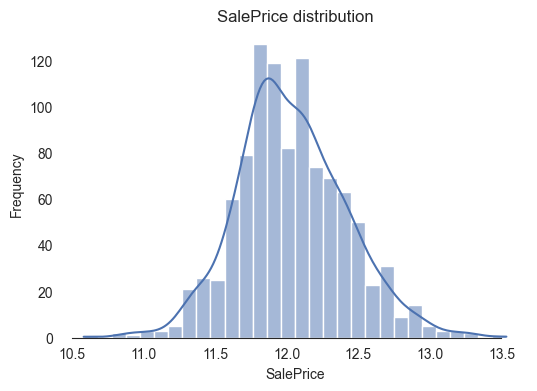

In [25]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(6, 4))
#Check the new distribution 
sns.histplot(y_train, color="b", kde=True)
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="SalePrice")
ax.set(title="SalePrice distribution")
sns.despine(trim=True, left=True)
plt.show()

The SalePrice is now normally distributed

### Skewed Features

In [26]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df_train.columns:
    if df_train[i].dtype in numeric_dtypes:
        numeric.append(i)

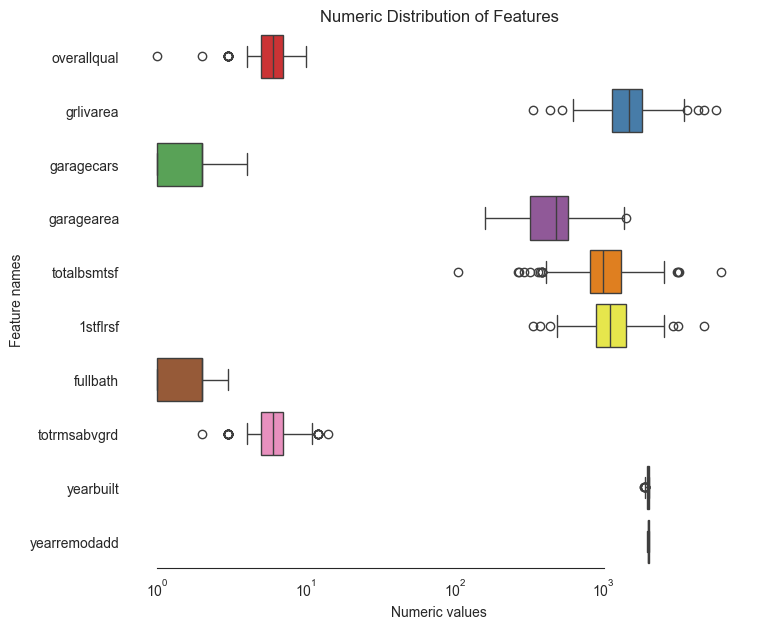

In [27]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(8, 7))
ax.set_xscale("log")
ax = sns.boxplot(data=df_train[numeric] , orient="h", palette="Set1")
ax.xaxis.grid(False)
ax.set(ylabel="Feature names")
ax.set(xlabel="Numeric values")
ax.set(title="Numeric Distribution of Features")
sns.despine(trim=True, left=True)

In [28]:
# Find skewed numerical features

skew_features = df_train[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})

# Find features with skew > 0.5 or skew < -0.5
high_skew = skew_features[abs(skew_features) > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))

# show the skewed features
skewness = pd.DataFrame({'Skew' :high_skew})
skewness.head(10)

There are 6 numerical features with Skew > 0.5 :


,Skew
totalbsmtsf,1.814533
1stflrsf,1.452066
grlivarea,1.406597
totrmsabvgrd,0.653993
yearremodadd,-0.557343
yearbuilt,-0.608162


### Imput missing values

Imputation:

* Special Value Imputation: For features related to the presence of a particular element (e.g., garage, basement), the missing values might indicate the absence of that element. In such cases, we can impute a special value or a 'Not Applicable' category.

* For columns with a significant but not overwhelming percentage of missing values (e.g., LotFrontage), we might consider imputing the missing values using the mean, median, or a predictive model.
* For categorical variables with a small percentage of missing values, we can impute the missing values with the most frequent category or a placeholder category.

In [29]:
df_train.head()

,mszoning,lotshape,landcontour,lotconfig,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,garagetype,garagefinish,garagequal,garagecond,paveddrive,saletype,salecondition,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,1stflrsf,fullbath,totrmsabvgrd,yearbuilt,yearremodadd
0,rl,reg,lvl,inside,nwames,norm,norm,1fam,1story,hip,compshg,plywood,plywood,ta,gd,cblock,ta,ta,no,alq,unf,gasa,ta,y,sbrkr,ta,typ,attchd,fin,ta,ta,y,wd,family,7,1411,2,544,1386,1411,2,6,1977,1977
1,rl,ir1,low,inside,sawyerw,norm,norm,1fam,2story,gable,compshg,plywood,plywood,gd,ta,cblock,gd,ta,gd,glq,unf,gasa,ex,y,sbrkr,ta,typ,attchd,fin,ta,ta,y,wd,normal,7,2062,2,454,1157,1180,2,7,1988,1989
2,rl,ir1,lvl,inside,names,norm,norm,1fam,1story,gable,compshg,metalsd,metalsd,ta,ta,cblock,ta,ta,no,unf,unf,gasa,gd,y,sbrkr,ta,typ,detchd,unf,ta,ta,y,cod,normal,5,1065,2,461,1065,1065,1,6,1960,1960
3,rl,ir1,lvl,inside,crawfor,norm,norm,1fam,2story,gable,compshg,wd_sdng,wd_sdng,ta,ta,brktil,gd,ta,no,rec,unf,gasa,ta,y,sbrkr,ta,typ,detchd,unf,ta,ta,y,wd,normal,6,2345,2,360,952,1170,2,9,1932,1950
4,rl,ir1,lvl,inside,brkside,norm,norm,1fam,1story,gable,compshg,wd_sdng,plywood,ta,po,cblock,ta,ta,no,unf,unf,gasa,ex,y,sbrkr,fa,mod,NaN,NaN,NaN,NaN,y,wd,normal,3,1306,0,0,728,1306,1,6,1940,1966


# Create Pipeline

In [30]:
def monkey_patch_get_signature_names_out():
    """Monkey patch some classes which did not handle get_feature_names_out()
       correctly in Scikit-Learn 1.0.*."""
    from inspect import Signature, signature, Parameter
    import pandas as pd
    from sklearn.impute import SimpleImputer
    from sklearn.pipeline import make_pipeline, Pipeline
    from sklearn.preprocessing import FunctionTransformer, StandardScaler

    default_get_feature_names_out = StandardScaler.get_feature_names_out

    if not hasattr(SimpleImputer, "get_feature_names_out"):
      print("Monkey-patching SimpleImputer.get_feature_names_out()")
      SimpleImputer.get_feature_names_out = default_get_feature_names_out

    if not hasattr(FunctionTransformer, "get_feature_names_out"):
        print("Monkey-patching FunctionTransformer.get_feature_names_out()")
        orig_init = FunctionTransformer.__init__
        orig_sig = signature(orig_init)

        def __init__(*args, feature_names_out=None, **kwargs):
            orig_sig.bind(*args, **kwargs)
            orig_init(*args, **kwargs)
            args[0].feature_names_out = feature_names_out

        __init__.__signature__ = Signature(
            list(signature(orig_init).parameters.values()) + [
                Parameter("feature_names_out", Parameter.KEYWORD_ONLY)])

        def get_feature_names_out(self, names=None):
            if callable(self.feature_names_out):
                return self.feature_names_out(self, names)
            assert self.feature_names_out == "one-to-one"
            return default_get_feature_names_out(self, names)

        FunctionTransformer.__init__ = __init__
        FunctionTransformer.get_feature_names_out = get_feature_names_out

monkey_patch_get_signature_names_out()

In [31]:
# Custom transformer for interaction terms
class InteractionTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, interaction_pairs):
        self.interaction_pairs = interaction_pairs
    
    def fit(self, X, y=None):
        # The fit method doesn't need to do anything in this case
        return self
    
    def transform(self, X):
        X = X.copy()
        for pair in self.interaction_pairs:
            feature_name = f"{pair[0]}_x_{pair[1]}"
            X[feature_name] = X[pair[0]] * X[pair[1]]
        return X

    def get_feature_names_out(self, input_features=None):
        # Generate the new feature names after the transformation
        new_feature_names = [f"{pair[0]}_x_{pair[1]}" for pair in self.interaction_pairs]
        if input_features is None:
            return new_feature_names
        else:
            # Append the new feature names to the original feature names if provided
            return input_features.tolist() + new_feature_names

def impute_missing_values(df):
 
    # Impute 'None' for categorical garage-related features
    garage_cat_cols = ['garagetype', 'garagefinish', 'garagequal', 'garagecond']
    df[garage_cat_cols] = df[garage_cat_cols].fillna('None')

    # Impute 'None' for categorical basement-related features
    basement_cat_cols = ['bsmtexposure', 'bsmtfintype2', 'bsmtfintype1', 'bsmtcond', 'bsmtqual']
    df[basement_cat_cols] = df[basement_cat_cols].fillna('None')

    # Impute 'TA' for the only missing value in MSZoning
    df['mszoning'] = df['mszoning'].fillna('TA')
    return df

class CustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # Nothing to fit, return self
        return self

    def transform(self, X):
        # Apply the imputation logic
        X = impute_missing_values(X.copy())
        return X

    def get_feature_names_out(self, input_features=None):
        # If input_features is not provided, try using the columns from the input DataFrame
        # Otherwise, just return the input_features as they are
        if input_features is None:
            try:
                return X.columns
            except AttributeError:
                raise ValueError("Input features must be defined when input is not a DataFrame.")
        else:
            return input_features

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler())

cat_pipeline = make_pipeline(
    CustomImputer(),
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False))

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

preprocessing = ColumnTransformer([
    ("log", log_pipeline, ["totalbsmtsf", "1stflrsf", "grlivarea", "totrmsabvgrd"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ("interaction_transformer", InteractionTransformer(interaction_pairs=[('overallqual', 'grlivarea')]), ["overallqual", "grlivarea"]),
],
remainder=default_num_pipeline)  


preprocessing.fit(df_train)

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('log',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler(...
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000014D125A1950>),
                                ('interaction_transformer',
                                 InteractionTransformer(interaction_pairs=[('overallqual',
                                                                            'grlivarea')]),
                                 ['overallqual', 'grlivarea'])])

# Modeling

# Ridge Regression

In [32]:
def ridge_objective(trial):
    # Define hyperparameter space
    params = {
        'alpha': trial.suggest_float('alpha', 0.001, 10.0),  # Regularization strength
    }
    
    ridge_reg = Ridge(**params, random_state=42)
    # Create the full pipeline
    full_pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ("ridge", ridge_reg),
    ])
    return -np.mean(cross_val_score(full_pipeline, df_train, y_train, cv=3, scoring='neg_root_mean_squared_error'))

# Create a study object and optimize the objective function
ridge_study = optuna.create_study(direction='minimize')
ridge_study.optimize(ridge_objective, n_trials=100, show_progress_bar=True)

# Get the best hyperparameters
best_params = ridge_study.best_params
print('Best parameters:', best_params)

# Get the best score
best_ridge = Ridge(**best_params, random_state=42)

 # Create the full pipeline
Ridge_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("regressor", best_ridge),
])
# Fit the pipeline to the training data
Ridge_pipeline.fit(df_train, y_train)

[I 2023-11-05 07:03:28,118] A new study created in memory with name: no-name-a8145a5e-c53f-4bd4-b995-1dd879cd6f73


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-11-05 07:03:28,219] Trial 0 finished with value: 0.13768901635466232 and parameters: {'alpha': 4.235993727542905}. Best is trial 0 with value: 0.13768901635466232.
[I 2023-11-05 07:03:28,328] Trial 1 finished with value: 0.1357132491199843 and parameters: {'alpha': 9.974175711455931}. Best is trial 1 with value: 0.1357132491199843.
[I 2023-11-05 07:03:28,418] Trial 2 finished with value: 0.14438116645134144 and parameters: {'alpha': 0.726565359402106}. Best is trial 1 with value: 0.1357132491199843.
[I 2023-11-05 07:03:28,508] Trial 3 finished with value: 0.13730955353675378 and parameters: {'alpha': 4.793160298662987}. Best is trial 1 with value: 0.1357132491199843.
[I 2023-11-05 07:03:28,598] Trial 4 finished with value: 0.14105353580462665 and parameters: {'alpha': 1.6568502278114865}. Best is trial 1 with value: 0.1357132491199843.
[I 2023-11-05 07:03:28,691] Trial 5 finished with value: 0.13713997125909963 and parameters: {'alpha': 5.0792482865148925}. Best is trial 1 with

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),...
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000014D125A1950>),
                                                 ('interaction_transformer',
                                                  InteractionTransformer(interaction_pairs=[('overallqual',
                                                                                             'grlivarea')]),
                                                  ['overallqual',
                                                   'grlivarea'])])),
                ('regressor', Ridge(alpha=9.999710602805367, random_state=42))])

## Lasso Regression

In [33]:
def lasso_objective(trial):
    # Define hyperparameter space
    params = {
        'alpha': trial.suggest_float('alpha', 0.001, 10.0),  # Regularization strength
    }
    
    lasso_reg = Lasso(**params, random_state=42)
    # Create the full pipeline
    full_pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ("lasso", lasso_reg),
    ])
    return -np.mean(cross_val_score(full_pipeline, df_train, y_train, cv=3, scoring='neg_root_mean_squared_error'))

# Create a study object and optimize the objective function
lasso_study = optuna.create_study(direction='minimize')
lasso_study.optimize(lasso_objective, n_trials=100, show_progress_bar=True)

# Get the best hyperparameters
best_params = lasso_study.best_params
print('Best parameters:', best_params)

# You can now create and train a Decision Tree regressor using the best hyperparameters found
best_lasso = Lasso(**best_params, random_state=42)

# Create the full pipeline
Lasso_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("regressor", best_lasso),
])

# Fit the pipeline to the training data
Lasso_pipeline.fit(df_train, y_train)

[I 2023-11-05 07:03:43,036] A new study created in memory with name: no-name-3c595eea-998b-4e74-82a9-66c49cd170ec


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-11-05 07:03:43,137] Trial 0 finished with value: 0.2404316301940348 and parameters: {'alpha': 9.01712482593363}. Best is trial 0 with value: 0.2404316301940348.
[I 2023-11-05 07:03:43,231] Trial 1 finished with value: 0.2376789065207213 and parameters: {'alpha': 1.1523894799033723}. Best is trial 1 with value: 0.2376789065207213.
[I 2023-11-05 07:03:43,319] Trial 2 finished with value: 0.24043076404240252 and parameters: {'alpha': 9.629354297366843}. Best is trial 1 with value: 0.2376789065207213.
[I 2023-11-05 07:03:43,405] Trial 3 finished with value: 0.24043435786948356 and parameters: {'alpha': 7.303473478766167}. Best is trial 1 with value: 0.2376789065207213.
[I 2023-11-05 07:03:43,491] Trial 4 finished with value: 0.23766662422493381 and parameters: {'alpha': 1.0320009488215862}. Best is trial 4 with value: 0.23766662422493381.
[I 2023-11-05 07:03:43,578] Trial 5 finished with value: 0.24043360009372847 and parameters: {'alpha': 7.752402940724747}. Best is trial 4 with v

c:\Users\Iñigo\.virtualenvs\midterm-FfkB8uAF\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.909e-01, tolerance: 1.004e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Iñigo\.virtualenvs\midterm-FfkB8uAF\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.238e+00, tolerance: 9.960e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Iñigo\.virtualenvs\midterm-FfkB8uAF\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[I 2023-11-05 07:03:44,191] Trial 10 finished with value: 0.1429582176002142 and parameters: {'alpha': 0.003042324855694112}. Best is trial 10 with value: 0.1429582176002142.
[I 2023-11-05 07:03:44,293] Trial 11 finished with value: 0.23763569762521244 and parameters: {'alpha': 0.3060881611865929}. Best is trial 10 with value: 0.1429582176002142.
[I 2023-11-05 07:03:44,395] Trial 12 finished with value: 0.22765781786331954 and parameters: {'alpha': 0.08514273069794429}. Best is trial 10 with value: 0.1429582176002142.
[I 2023-11-05 07:03:44,492] Trial 13 finished with value: 0.23799889754462034 and parameters: {'alpha': 2.6411878317316595}. Best is trial 10 with value: 0.1429582176002142.
[I 2023-11-05 07:03:44,581] Trial 14 finished with value: 0.23794490537470966 and parameters: {'alpha': 2.465395840099866}. Best is trial 10 with value: 0.1429582176002142.
[I 2023-11-05 07:03:44,687] Trial 15 finished with value: 0.23763854229759832 and parameters: {'alpha': 0.15845135804247676}. Bes

c:\Users\Iñigo\.virtualenvs\midterm-FfkB8uAF\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.358e-01, tolerance: 9.960e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Iñigo\.virtualenvs\midterm-FfkB8uAF\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.029e+00, tolerance: 9.953e-03
  model = cd_fast.enet_coordinate_descent(


[I 2023-11-05 07:03:45,111] Trial 18 finished with value: 0.14915489038022925 and parameters: {'alpha': 0.004564706557396811}. Best is trial 10 with value: 0.1429582176002142.
[I 2023-11-05 07:03:45,202] Trial 19 finished with value: 0.23777559336524376 and parameters: {'alpha': 1.778479513517723}. Best is trial 10 with value: 0.1429582176002142.
[I 2023-11-05 07:03:45,295] Trial 20 finished with value: 0.23840688301047827 and parameters: {'alpha': 3.6823881471914186}. Best is trial 10 with value: 0.1429582176002142.
[I 2023-11-05 07:03:45,409] Trial 21 finished with value: 0.19549030242032836 and parameters: {'alpha': 0.04473721872132863}. Best is trial 10 with value: 0.1429582176002142.
[I 2023-11-05 07:03:45,505] Trial 22 finished with value: 0.2376976690445327 and parameters: {'alpha': 1.3070137187631823}. Best is trial 10 with value: 0.1429582176002142.
[I 2023-11-05 07:03:45,598] Trial 23 finished with value: 0.2376524066138838 and parameters: {'alpha': 0.8571180959919299}. Best 

c:\Users\Iñigo\.virtualenvs\midterm-FfkB8uAF\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.588e-01, tolerance: 1.004e-02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Iñigo\.virtualenvs\midterm-FfkB8uAF\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.562e+00, tolerance: 9.960e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\Iñigo\.virtualenvs\midterm-FfkB8uAF\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

[I 2023-11-05 07:03:48,605] Trial 52 finished with value: 0.13701348462247215 and parameters: {'alpha': 0.001366947725514836}. Best is trial 52 with value: 0.13701348462247215.
[I 2023-11-05 07:03:48,717] Trial 53 finished with value: 0.18230284070894257 and parameters: {'alpha': 0.03195855814525839}. Best is trial 52 with value: 0.13701348462247215.
[I 2023-11-05 07:03:48,808] Trial 54 finished with value: 0.2376361996534385 and parameters: {'alpha': 0.46876171602809535}. Best is trial 52 with value: 0.13701348462247215.
[I 2023-11-05 07:03:48,900] Trial 55 finished with value: 0.23763546292370918 and parameters: {'alpha': 0.3759971276913928}. Best is trial 52 with value: 0.13701348462247215.
[I 2023-11-05 07:03:48,992] Trial 56 finished with value: 0.23765698388031473 and parameters: {'alpha': 0.919479081496284}. Best is trial 52 with value: 0.13701348462247215.
[I 2023-11-05 07:03:49,082] Trial 57 finished with value: 0.23766764209598779 and parameters: {'alpha': 1.0427914325189265}

c:\Users\Iñigo\.virtualenvs\midterm-FfkB8uAF\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.018e+00, tolerance: 1.498e-02
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),...
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000014D125A1950>),
                                                 ('interaction_transformer',
                                                  InteractionTransformer(interaction_pairs=[('overallqual',
                                                                                             'grlivarea')]),
                                                  ['overallqual',
                                                   'grlivarea'])])),
                ('regressor',
                 Lasso(alpha=0.001366947725514836, random_state=42))])

## Decision Tree

In [34]:
def dt_objective(trial):
    # Define hyperparameter space
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_float('min_samples_split', 0.1, 1),
        'min_samples_leaf': trial.suggest_float('min_samples_leaf', 0.1, 0.5),
        'max_features': trial.suggest_categorical('max_features', [6, 8, 10, 20, 'sqrt', 'log2']),
    }
    
    dt = DecisionTreeRegressor(**params, random_state=42)
    # Create the full pipeline
    full_pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ("decision_tree", dt),
    ])
    return -np.mean(cross_val_score(full_pipeline, df_train, y_train, cv=3, scoring='neg_root_mean_squared_error'))

dt_study = optuna.create_study(direction='minimize')
dt_study.optimize(dt_objective, n_trials=100, show_progress_bar=True)
# Get the best hyperparameters
best_params = dt_study.best_params
print('Best parameters:', best_params)

# You can now create and train a Decision Tree regressor using the best hyperparameters found
best_DT = DecisionTreeRegressor(**best_params, random_state=42)

# Create the full pipeline
DT_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("regressor", best_DT),
])

# Fit the pipeline to the training data
DT_pipeline.fit(df_train, y_train)

[I 2023-11-05 07:03:58,179] A new study created in memory with name: no-name-fcd25329-2622-4c5a-9002-b6bed32d4cd5


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-11-05 07:03:58,273] Trial 0 finished with value: 0.36618851703880906 and parameters: {'max_depth': 19, 'min_samples_split': 0.7237618559705405, 'min_samples_leaf': 0.49213568260135254, 'max_features': 'log2'}. Best is trial 0 with value: 0.36618851703880906.
[I 2023-11-05 07:03:58,362] Trial 1 finished with value: 0.36473684526031575 and parameters: {'max_depth': 3, 'min_samples_split': 0.6951522755550631, 'min_samples_leaf': 0.39940672532547017, 'max_features': 8}. Best is trial 1 with value: 0.36473684526031575.
[I 2023-11-05 07:03:58,453] Trial 2 finished with value: 0.26523237471683253 and parameters: {'max_depth': 31, 'min_samples_split': 0.17062422539703836, 'min_samples_leaf': 0.14044733167510431, 'max_features': 20}. Best is trial 2 with value: 0.26523237471683253.
[I 2023-11-05 07:03:58,539] Trial 3 finished with value: 0.2896604704483728 and parameters: {'max_depth': 21, 'min_samples_split': 0.2545082217036063, 'min_samples_leaf': 0.11343195247212488, 'max_features': 

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000014D125A1950>),
                                                 ('interaction_transformer',
                                                  InteractionTransformer(interaction_pairs=[('overallqual',
                                                                                             'grlivarea')]),
                                                  ['overallqual',
                                                   'grlivarea'])])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=9, max_features=20,
                                       min_samples_leaf=0.1142385085672744,
                                       min_samples_split=0.19256502737177428,
                                       random_state=42))])

## Random Forest

In [35]:
def objective_rf(trial):
    # Suggest values for the hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_features = trial.suggest_categorical('max_features', [6, 8, 10, 20, 'sqrt', 'log2'])
    max_depth = trial.suggest_int('max_depth', 10, 30, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Create the random forest regressor with suggested hyperparameters
    rf = RandomForestRegressor(
        n_estimators=n_estimators, max_features=max_features,
        max_depth=max_depth, min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf, bootstrap=bootstrap, random_state=42
    )

    # Create the full pipeline
    full_pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ("random_forest", rf),
    ])

    # Perform cross-validation and return the negative RMSE
    return -np.mean(cross_val_score(full_pipeline, df_train, y_train, cv=3, scoring='neg_root_mean_squared_error'))

study_rf = optuna.create_study(direction='minimize')
study_rf.optimize(objective_rf, n_trials=100, show_progress_bar=True)
# Get the best hyperparameters
best_params = study_rf.best_params
print('Best parameters:', best_params)
best_RF = RandomForestRegressor(**best_params, random_state=42)

# Create the full pipeline
RF_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("regressor", best_RF),
])

# Fit the pipeline to the training data
RF_pipeline.fit(df_train, y_train)

[I 2023-11-05 07:04:09,307] A new study created in memory with name: no-name-9d6967c0-05f9-4994-8a5c-8246bda59a96


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-11-05 07:04:10,005] Trial 0 finished with value: 0.17256457835804503 and parameters: {'n_estimators': 217, 'max_features': 6, 'max_depth': 20, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 0 with value: 0.17256457835804503.
[I 2023-11-05 07:04:10,596] Trial 1 finished with value: 0.1573232163449304 and parameters: {'n_estimators': 128, 'max_features': 10, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 3, 'bootstrap': False}. Best is trial 1 with value: 0.1573232163449304.
[I 2023-11-05 07:04:11,192] Trial 2 finished with value: 0.17554050044955063 and parameters: {'n_estimators': 176, 'max_features': 6, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': True}. Best is trial 1 with value: 0.1573232163449304.
[I 2023-11-05 07:04:11,982] Trial 3 finished with value: 0.17153902388090314 and parameters: {'n_estimators': 233, 'max_features': 6, 'max_depth': 30, 'min_samples_split': 7, 'min_samples_leaf': 2, '

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),...
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000014D125A1950>),
                                                 ('interaction_transformer',
                                                  InteractionTransformer(interaction_pairs=[('overallqual',
                                                                                             'grlivarea')]),
                                                  ['overallqual',
                                                   'grlivarea'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, max_features=20,
                                       min_samples_split=6, n_estimators=277,
                                       random_state=42))])

## XG Boost

In [134]:
def xgb_objective(trial):
    # Define hyperparameter space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }
    
    xg_boost = xgb.XGBRegressor(**params, random_state=42)
    # Create the full pipeline
    full_pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ("xg_boost", xg_boost),
    ])
    return -np.mean(cross_val_score(full_pipeline, df_train, y_train, cv=3, scoring='neg_root_mean_squared_error'))
xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(xgb_objective, n_trials=100, show_progress_bar=True)
best_XGB = xgb.XGBRegressor(**best_params, random_state=42)

# Create the full pipeline
XGB_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("regressor", best_XGB),
])

# Fit the pipeline to the training data
XGB_pipeline.fit(df_train, y_train)

[I 2023-11-05 08:14:31,349] A new study created in memory with name: no-name-56215a21-39b3-4572-9c92-61bb42fc4a6a


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-11-05 08:14:31,707] Trial 0 finished with value: 0.32844543474600146 and parameters: {'n_estimators': 271, 'max_depth': 2, 'learning_rate': 0.0010077913826842847, 'subsample': 0.2922048474818585, 'colsample_bytree': 0.7498196319017352, 'gamma': 1.304357424590834, 'min_child_weight': 7}. Best is trial 0 with value: 0.32844543474600146.
[I 2023-11-05 08:14:31,967] Trial 1 finished with value: 0.20988253471949367 and parameters: {'n_estimators': 307, 'max_depth': 2, 'learning_rate': 0.061585612978032875, 'subsample': 0.6952367479268398, 'colsample_bytree': 0.33261135544924214, 'gamma': 3.801974970578874, 'min_child_weight': 9}. Best is trial 1 with value: 0.20988253471949367.
[I 2023-11-05 08:14:32,431] Trial 2 finished with value: 0.35900625395317526 and parameters: {'n_estimators': 321, 'max_depth': 3, 'learning_rate': 0.00029494717371883824, 'subsample': 0.6951108338094699, 'colsample_bytree': 0.9723913827571566, 'gamma': 0.728374171514084, 'min_child_weight': 1}. Best is trial

c:\Users\Iñigo\.virtualenvs\midterm-FfkB8uAF\Lib\site-packages\xgboost\core.py:160: UserWarning: [08:15:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=20, max_features=20, max_leaves=None,
                              min_child_weight=None, min_samples_leaf=1,
                              min_samples_split=6, missing=nan,
                              monotone_constraints=None, multi_strategy=None, ...))])

## Model Evaluation

In [135]:
pipelines = {
    'Ridge': Ridge_pipeline,
    'Lasso': Lasso_pipeline,
    'Decision Tree': DT_pipeline,
    'Random Forest': RF_pipeline,
    'XGBoost': XGB_pipeline
}
# Function to fit pipelines if not already done
def fit_pipelines(pipelines, X_train, y_train):
    for name, pipeline in pipelines.items():
        if 'fit' not in dir(pipeline):
            pipeline.fit(X_train, y_train)

# Function to get feature names from a pipeline
def get_feature_names(pipeline):
    # If the last step is a transformer, use its 'get_feature_names_out' method
    if hasattr(pipeline.named_steps['preprocessing'], 'get_feature_names_out'):
        return pipeline.named_steps['preprocessing'].get_feature_names_out()
    # Otherwise, return the column names from the input data
    else:
        return df_test.columns  # or the appropriate way you have to get feature names

def calculate_importances(pipeline, X_test, y_test):
    feature_names = get_feature_names(pipeline)
    # The preprocessing step is assumed to be named 'preprocessing'
    X_test_transformed = pipeline.named_steps['preprocessing'].transform(X_test)

    # The regressor step is assumed to be named 'regressor'
    result = permutation_importance(
        pipeline.named_steps['regressor'],
        X_test_transformed, y_test, n_repeats=10, random_state=42, n_jobs=-1
    )
    return dict(zip(feature_names, result.importances_mean))

results = {}
feature_importances = {}
# Iterate over each pipeline and evaluate them
for name, pipeline in pipelines.items():
    # Generate predictions
    y_pred = pipeline.predict(df_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate feature importances
    model = pipeline.named_steps['regressor']
    X_test_transformed = pipeline.named_steps['preprocessing'].transform(df_test)
    importances = calculate_importances(pipeline, df_test, y_test)
    feature_importances[name] = importances
    
    # Store the results
    results[name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse,
        'R-squared': r2
    }

# Convert the results dictionary to a DataFrame for a nice table
report = pd.DataFrame(results).T

# Display the report
display(report)

,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error,R-squared
Ridge,0.020845,0.100301,0.144379,0.889700
Lasso,0.022411,0.102969,0.149703,0.881415
Decision Tree,0.104252,0.240359,0.322881,0.448364
Random Forest,0.026897,0.108208,0.164003,0.857677
XGBoost,0.024561,0.109754,0.156719,0.870039


### Feature Importance

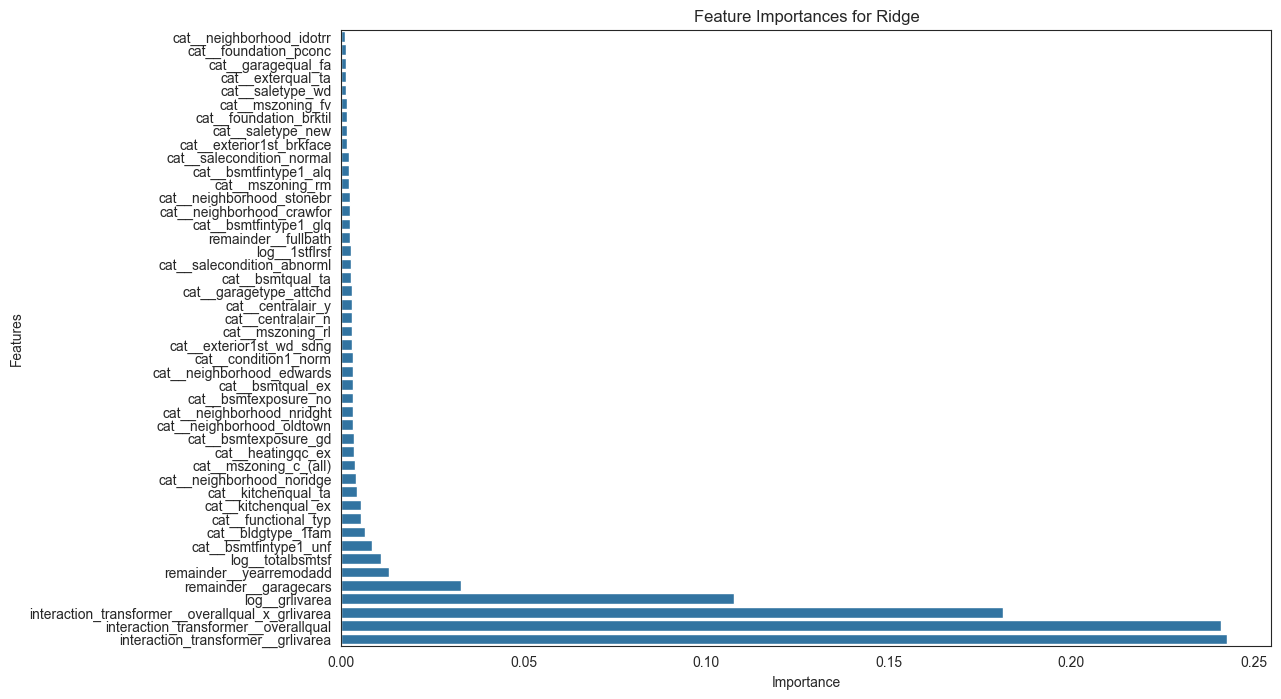

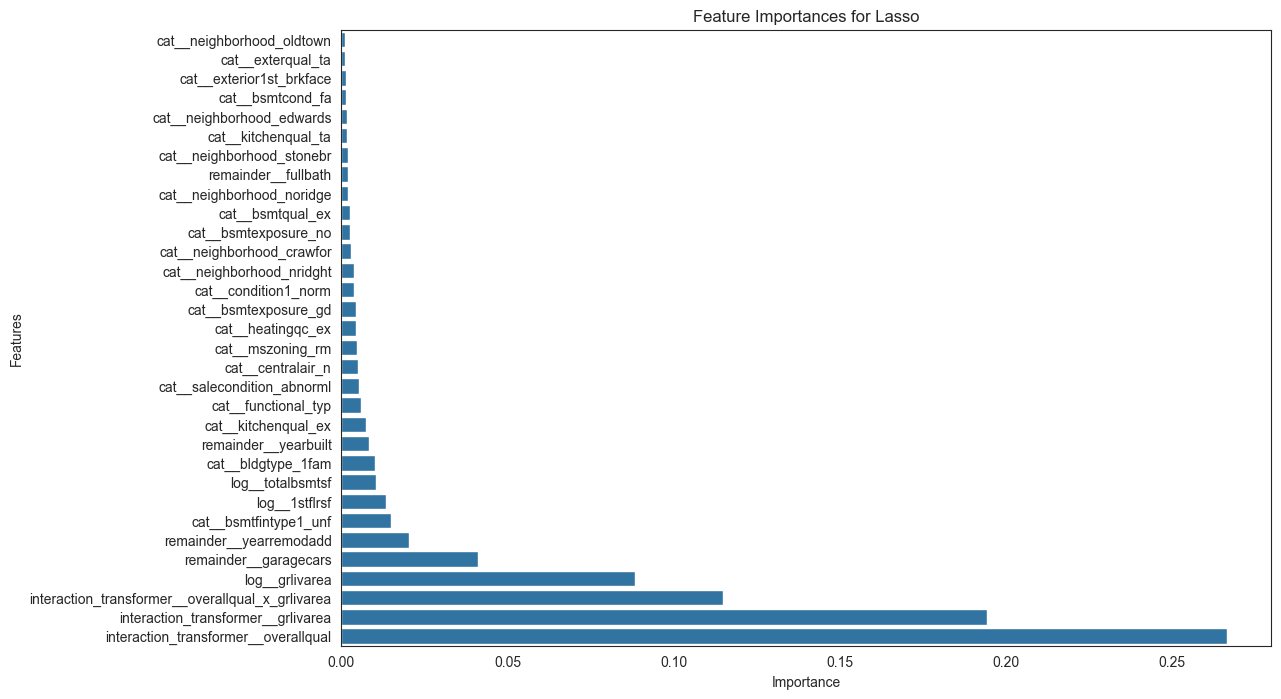

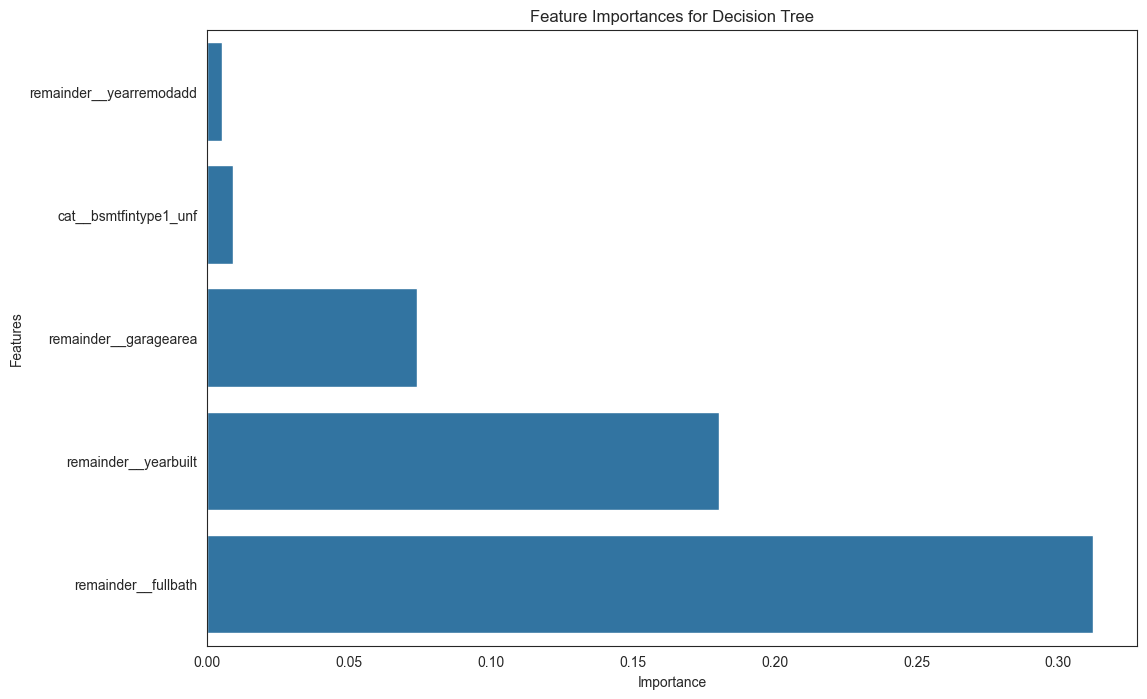

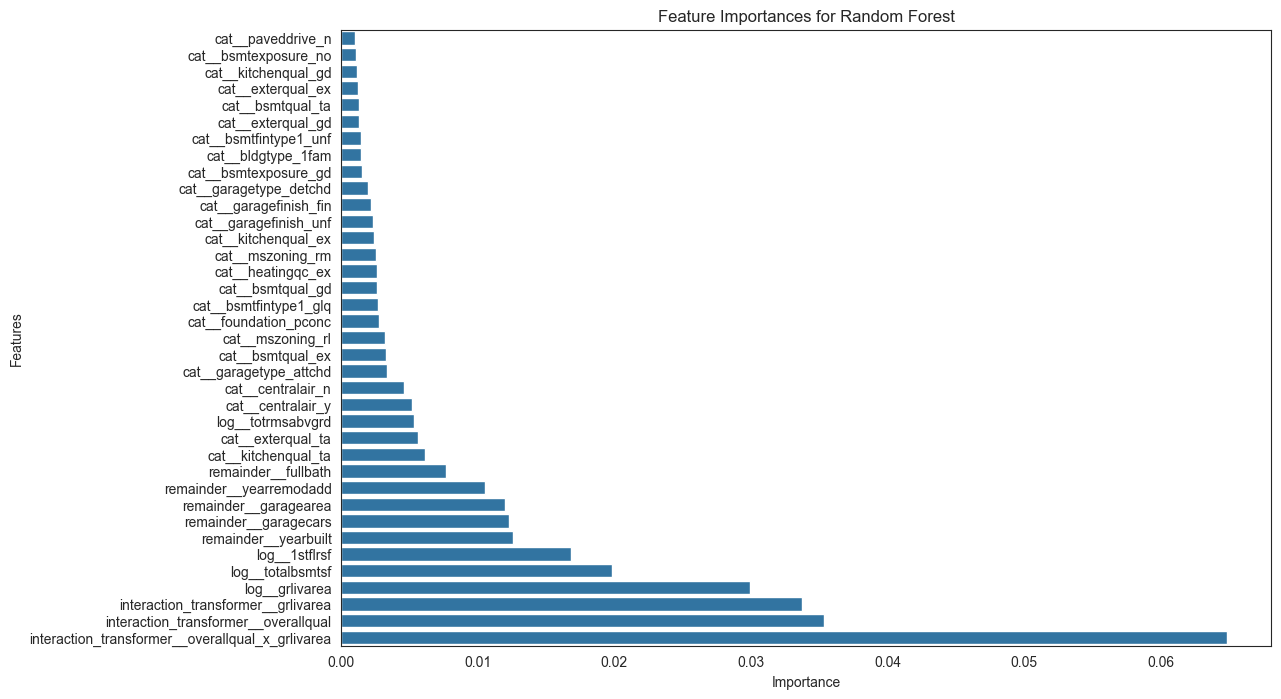

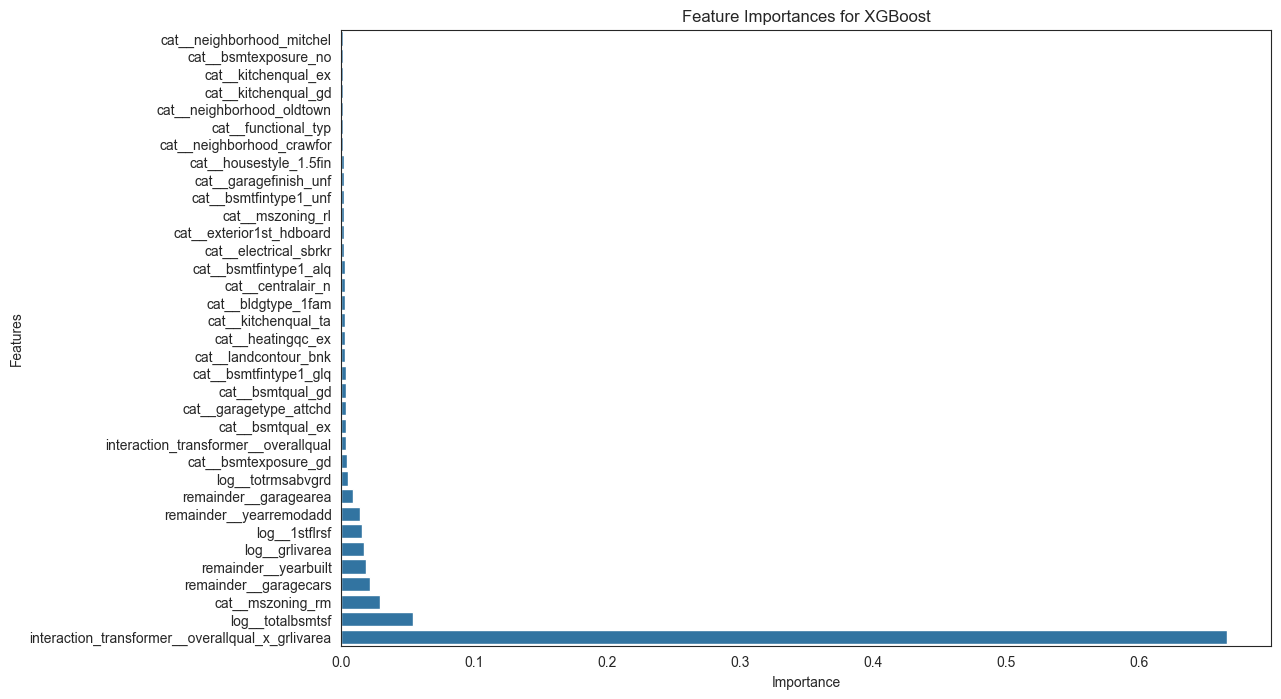

In [136]:
feature_importance_df = pd.DataFrame(feature_importances)
# Let's filter out features with zero importance
for model in feature_importance_df.columns:
    # Select features where importance is greater than 0.001
    nonzero_importances = feature_importance_df.loc[feature_importance_df[model] > 0.001, model]
    # Sort the features by importance
    sorted_idx = nonzero_importances.sort_values().index
    
    if len(sorted_idx) > 0:  # Only plot if there are non-zero importances
        plt.figure(figsize=(12, 8))
        # Create a bar plot
        sns.barplot(x=nonzero_importances.loc[sorted_idx], y=sorted_idx)
        plt.title(f'Feature Importances for {model}')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.show()
    else:
        print(f"No non-zero feature importances for model: {model}")


In [74]:
feature_importance_df['Lasso'].sort_values(ascending=False)[:10]

interaction_transformer__overallqual                0.266654
interaction_transformer__grlivarea                  0.194398
interaction_transformer__overallqual_x_grlivarea    0.114932
log__grlivarea                                      0.088246
remainder__garagecars                               0.041020
remainder__yearremodadd                             0.020406
cat__bsmtfintype1_unf                               0.014953
log__1stflrsf                                       0.013469
log__totalbsmtsf                                    0.010535
cat__bldgtype_1fam                                  0.010261
Name: Lasso, dtype: float64

## Feature Evaluation

In [109]:
#from  feature_importance_df get the features with non-zero importance
nonzero_importances = feature_importance_df.loc[feature_importance_df['Lasso'] > 0.001, 'Lasso']
# Sort the features by importance
sorted_idx = nonzero_importances.sort_values().index

In [113]:
top_lasso_features = sorted_idx.to_list()

In [147]:
base_feature_names = [name.split('__')[-1] for name in top_lasso_features]

# If the base feature name contains an underscore indicating a specific category,
# such as 'neighborhood_edwards', split further and keep only the first part, 'neighborhood'.
simplified_feature_names = [name.split('_')[0] if '_' in name else name for name in base_feature_names]

print(set(simplified_feature_names))

{'functional', 'bsmtfintype1', '1stflrsf', 'bsmtqual', 'fullbath', 'grlivarea', 'garagecars', 'bldgtype', 'exterqual', 'heatingqc', 'kitchenqual', 'exterior1st', 'bsmtexposure', 'neighborhood', 'yearremodadd', 'bsmtcond', 'yearbuilt', 'totalbsmtsf', 'mszoning', 'condition1', 'overallqual', 'salecondition', 'centralair'}


In [137]:
def xgb_objective_red(trial):
    # Define hyperparameter space
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 400),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-1, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'gamma': trial.suggest_float('gamma', 0, 5),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
    }
    
    xg_boost_red = xgb.XGBRegressor(**params, random_state=42)
    # Create the full pipeline
    full_pipeline = Pipeline([
        ("preprocessing", preprocessing),
        ("xg_boost_red", xg_boost_red),
    ])

    pipeline = full_pipeline.named_steps['preprocessing']
    X_transformed = pipeline.fit_transform(df_train)
    X_transformed_df = pd.DataFrame(X_transformed, columns=pipeline.get_feature_names_out())
    return -np.mean(cross_val_score(xg_boost_red, X_transformed_df[top_lasso_features], y_train, cv=3, scoring='neg_root_mean_squared_error'))

xgb_study_red = optuna.create_study(direction='minimize')
xgb_study_red.optimize(xgb_objective_red, n_trials=100, show_progress_bar=True)
# Get the best hyperparameters
best_params = xgb_study_red.best_params
print('Best parameters:', best_params)
best_XGB_red = xgb.XGBRegressor(**best_params, random_state=42)

[I 2023-11-05 08:15:46,563] A new study created in memory with name: no-name-e9623162-c2d5-493f-83a9-770c68b62833


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2023-11-05 08:15:46,969] Trial 0 finished with value: 0.3569075152136823 and parameters: {'n_estimators': 321, 'max_depth': 6, 'learning_rate': 0.0003483729463864468, 'subsample': 0.3806474834047048, 'colsample_bytree': 0.7985955720420318, 'gamma': 0.9252705503538622, 'min_child_weight': 5}. Best is trial 0 with value: 0.3569075152136823.
[I 2023-11-05 08:15:47,173] Trial 1 finished with value: 0.3578072573592343 and parameters: {'n_estimators': 202, 'max_depth': 14, 'learning_rate': 0.0006700405682501238, 'subsample': 0.1871926514455437, 'colsample_bytree': 0.610514534544877, 'gamma': 1.715103620159622, 'min_child_weight': 5}. Best is trial 0 with value: 0.3569075152136823.
[I 2023-11-05 08:15:47,309] Trial 2 finished with value: 0.3557097065960993 and parameters: {'n_estimators': 85, 'max_depth': 22, 'learning_rate': 0.001394569750982826, 'subsample': 0.5079389258744195, 'colsample_bytree': 0.9266081291002731, 'gamma': 1.5469792541912109, 'min_child_weight': 5}. Best is trial 2 wi

In [141]:
# Create the full pipeline
XGB_red_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("regressor", best_XGB_red),
])

# Fit the pipeline to the raw training data
XGB_red_pipeline.fit(df_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('log',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),...
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None,
                              learning_rate=0.03410743216987422, max_bin=None,
                              max_cat_threshold=None, max_cat_to_onehot=None,
                              max_delta_step=None, max_depth=5, max_leaves=None,
                              min_child_weight=2, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=282, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [143]:
pipelines = {
    'Ridge': Ridge_pipeline,
    'Lasso': Lasso_pipeline,
    'Decision Tree': DT_pipeline,
    'Random Forest': RF_pipeline,
    'XGBoost': XGB_pipeline,
    'XGBoost (Reduced)': XGB_red_pipeline
}
# Function to fit pipelines if not already done
def fit_pipelines(pipelines, X_train, y_train):
    for name, pipeline in pipelines.items():
        if 'fit' not in dir(pipeline):
            pipeline.fit(X_train, y_train)

# Function to get feature names from a pipeline
def get_feature_names(pipeline):
    # If the last step is a transformer, use its 'get_feature_names_out' method
    if hasattr(pipeline.named_steps['preprocessing'], 'get_feature_names_out'):
        return pipeline.named_steps['preprocessing'].get_feature_names_out()
    # Otherwise, return the column names from the input data
    else:
        return df_test.columns  # or the appropriate way you have to get feature names

def calculate_importances(pipeline, X_test, y_test):
    feature_names = get_feature_names(pipeline)
    # The preprocessing step is assumed to be named 'preprocessing'
    X_test_transformed = pipeline.named_steps['preprocessing'].transform(X_test)

    # The regressor step is assumed to be named 'regressor'
    result = permutation_importance(
        pipeline.named_steps['regressor'],
        X_test_transformed, y_test, n_repeats=10, random_state=42, n_jobs=-1
    )
    return dict(zip(feature_names, result.importances_mean))

results = {}
feature_importances = {}
# Iterate over each pipeline and evaluate them
for name, pipeline in pipelines.items():
    # Generate predictions
    y_pred = pipeline.predict(df_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate feature importances
    model = pipeline.named_steps['regressor']
    X_test_transformed = pipeline.named_steps['preprocessing'].transform(df_test)
    importances = calculate_importances(pipeline, df_test, y_test)
    feature_importances[name] = importances
    
    # Store the results
    results[name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'Root Mean Squared Error': rmse,
        'R-squared': r2
    }

# Convert the results dictionary to a DataFrame for a nice table
report = pd.DataFrame(results).T

# Display the report
display(report)

,Mean Squared Error,Mean Absolute Error,Root Mean Squared Error,R-squared
Ridge,0.020845,0.100301,0.144379,0.889700
Lasso,0.022411,0.102969,0.149703,0.881415
Decision Tree,0.104252,0.240359,0.322881,0.448364
Random Forest,0.026897,0.108208,0.164003,0.857677
XGBoost,0.024561,0.109754,0.156719,0.870039
XGBoost (Reduced),0.020886,0.099089,0.144521,0.889483


# Conclusion

I will use XGBoost (Reduced) since it has a simillar R-squared and uses a simplified set of features

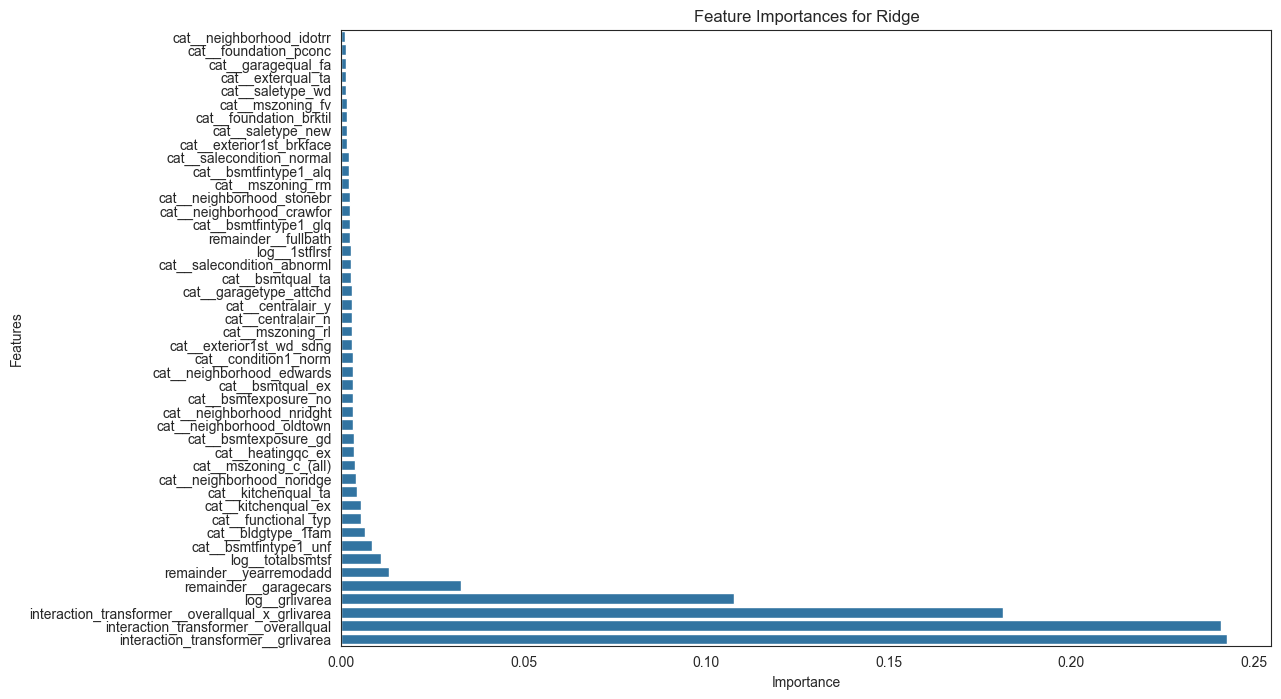

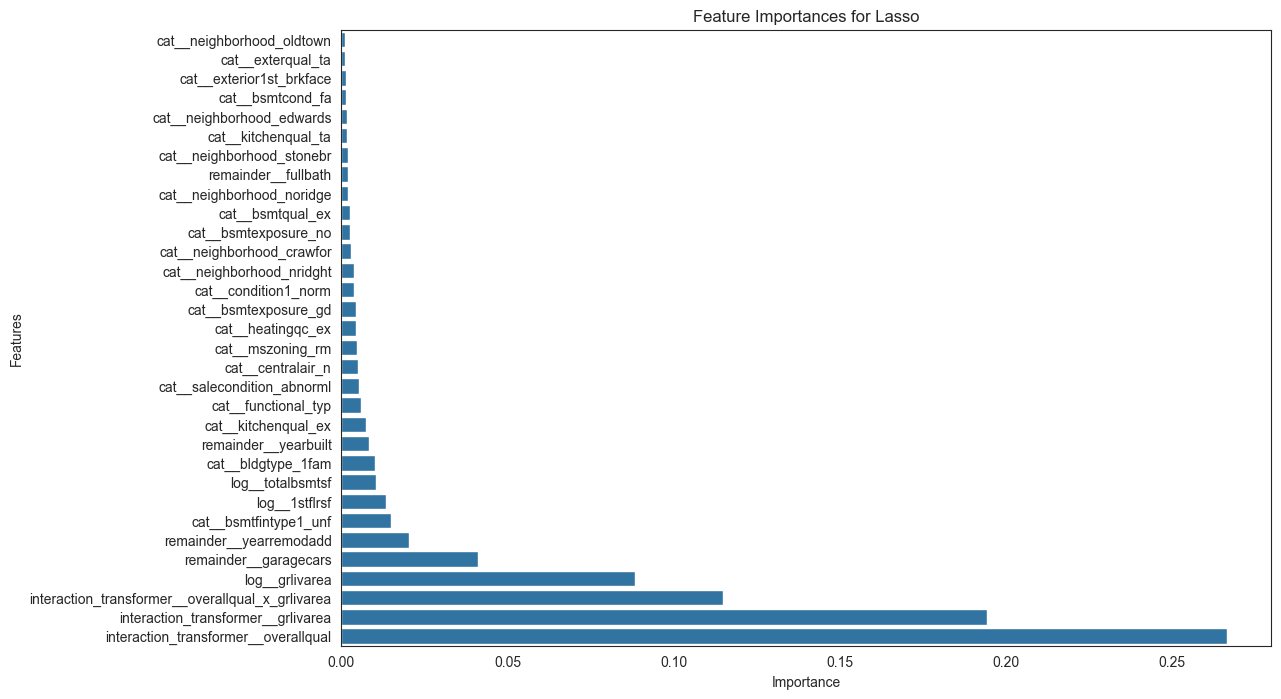

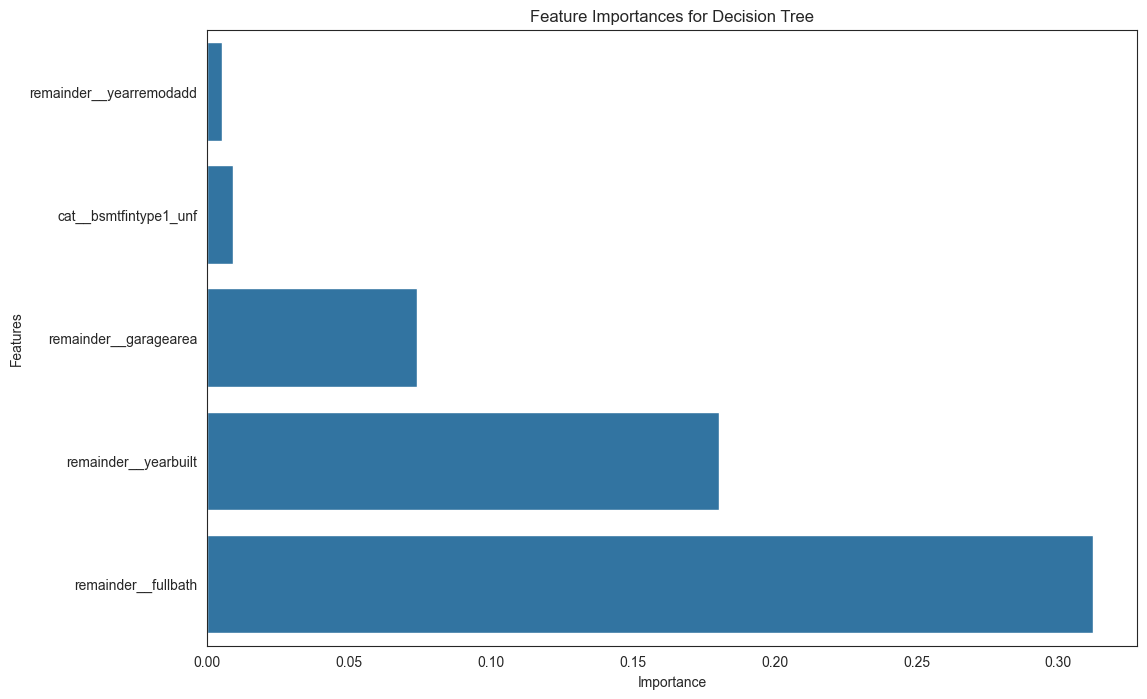

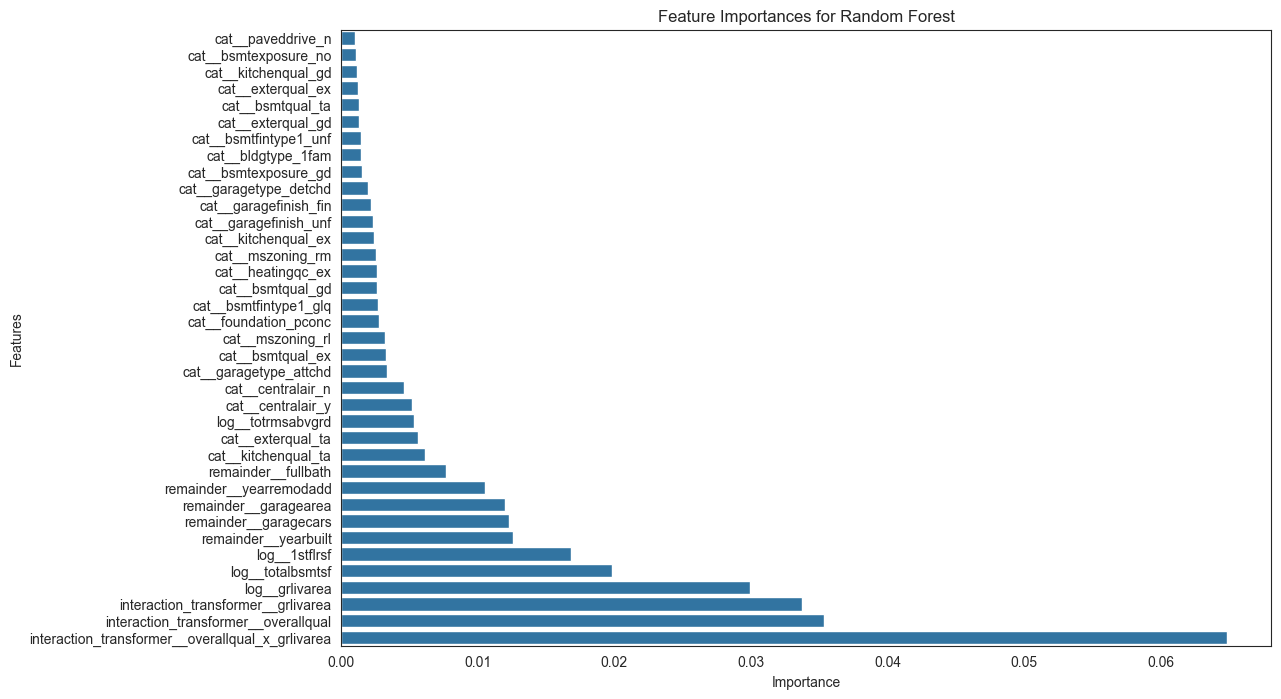

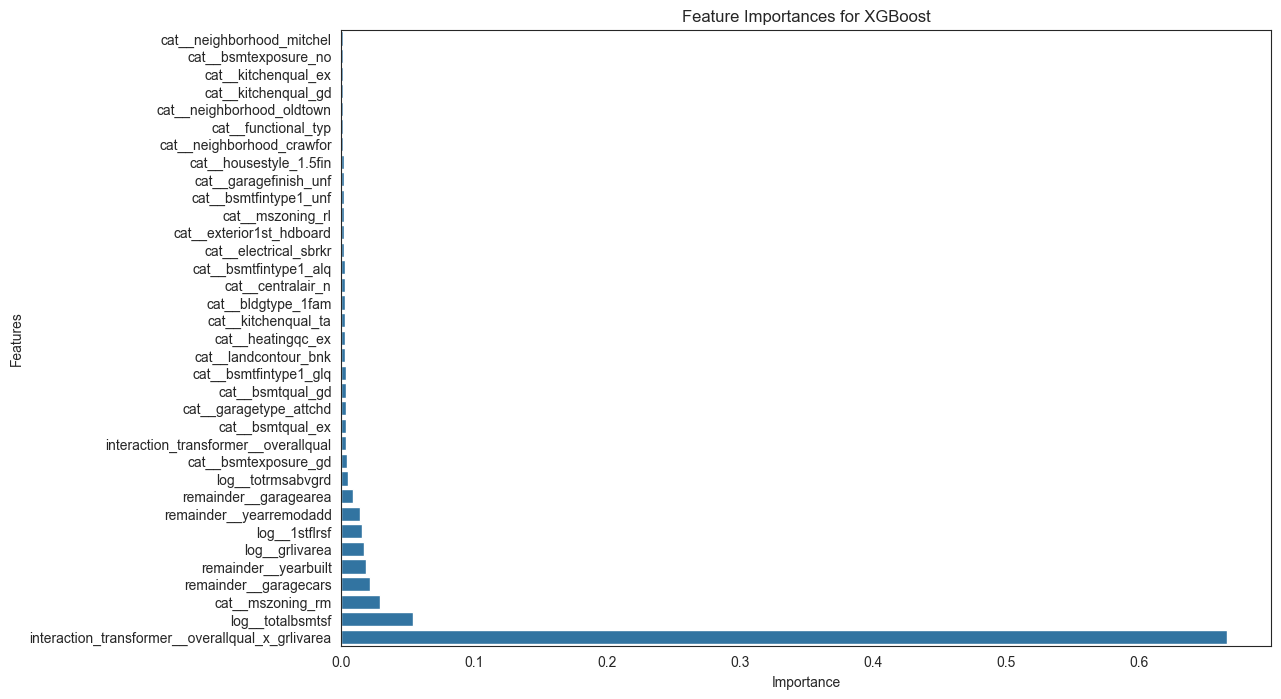

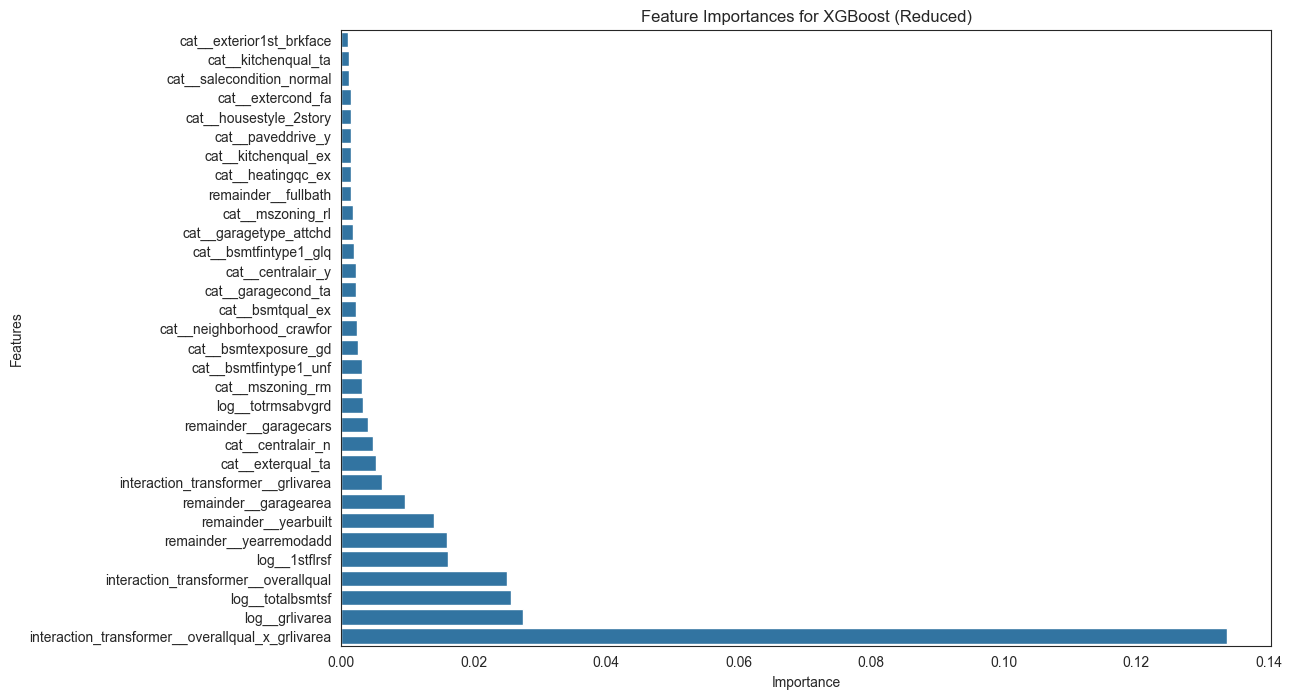

In [144]:
feature_importance_df = pd.DataFrame(feature_importances)
# Let's filter out features with zero importance
for model in feature_importance_df.columns:
    # Select features where importance is greater than 0.001
    nonzero_importances = feature_importance_df.loc[feature_importance_df[model] > 0.001, model]
    # Sort the features by importance
    sorted_idx = nonzero_importances.sort_values().index
    
    if len(sorted_idx) > 0:  # Only plot if there are non-zero importances
        plt.figure(figsize=(12, 8))
        # Create a bar plot
        sns.barplot(x=nonzero_importances.loc[sorted_idx], y=sorted_idx)
        plt.title(f'Feature Importances for {model}')
        plt.xlabel('Importance')
        plt.ylabel('Features')
        plt.show()
    else:
        print(f"No non-zero feature importances for model: {model}")


In [148]:
features = ['functional', 'bsmtfintype1', '1stflrsf', 'bsmtqual', 'fullbath', 'grlivarea', 'garagecars', 'bldgtype', 'exterqual', 'heatingqc', 
            'kitchenqual', 'exterior1st', 'bsmtexposure', 'neighborhood', 'yearremodadd', 'bsmtcond', 'yearbuilt', 'totalbsmtsf', 'mszoning', 
            'condition1', 'overallqual', 'salecondition', 'centralair']

In [151]:
first_row = df_train[features].iloc[0]

In [152]:
row_dict = first_row.to_dict()

In [153]:
row_dict

{'functional': 'typ',
 'bsmtfintype1': 'alq',
 '1stflrsf': 1411,
 'bsmtqual': 'ta',
 'fullbath': 2,
 'grlivarea': 1411,
 'garagecars': 2,
 'bldgtype': '1fam',
 'exterqual': 'ta',
 'heatingqc': 'ta',
 'kitchenqual': 'ta',
 'exterior1st': 'plywood',
 'bsmtexposure': 'no',
 'neighborhood': 'nwames',
 'yearremodadd': 1977,
 'bsmtcond': 'ta',
 'yearbuilt': 1977,
 'totalbsmtsf': 1386,
 'mszoning': 'rl',
 'condition1': 'norm',
 'overallqual': 7,
 'salecondition': 'family',
 'centralair': 'y'}

In [154]:
house_sample = {'functional': 'typ',
                'bsmtfintype1': 'alq',
                '1stflrsf': 1411,
                'bsmtqual': 'ta',
                'fullbath': 2,
                'grlivarea': 1411,
                'garagecars': 2,
                'bldgtype': '1fam',
                'exterqual': 'ta',
                'heatingqc': 'ta',
                'kitchenqual': 'ta',
                'exterior1st': 'plywood',
                'bsmtexposure': 'no',
                'neighborhood': 'nwames',
                'yearremodadd': 1977,
                'bsmtcond': 'ta',
                'yearbuilt': 1977,
                'totalbsmtsf': 1386,
                'mszoning': 'rl',
                'condition1': 'norm',
                'overallqual': 7,
                'salecondition': 'family',
                'centralair': 'y'}